# Variables

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
df=pd.read_excel('dataset/Drug_addicion_in_spain.xlsx')
df.head()

,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,...,friends’ houses at night,Satisfied with workplace,Case in court,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage
0,between 22 to 35 years,Male,Undergraduate,One drug,Hostel/Hall,No,Disease,Alone,Yes,Depression/ inferiority/Guilt,...,"No, I don't",No,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
1,between 22 to 35 years,Male,H.S.C / A levels,I have no idea,With Family/Relatives,Yes,Should avoid,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,No,No,No,"Yes, every day.",Yes,"Yes, often they do",i don't know/ confused,"Yes, It's possible",Occasionally
2,15 to 22 years,Male,H.S.C / A levels,One drug,With Family/Relatives,Yes,Disease,Friends,Yes,Depression/ inferiority/Guilt,...,Sometimes,No,Yes,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"No, It's not possible",Once/twice a week
3,between 22 to 35 years,Male,Undergraduate,One drug,With Family/Relatives,No,Social trend,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
4,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,"Social trend, Should avoid",Alone,No,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             1426 non-null   object
 1   Gender                          1426 non-null   object
 2   Education                       1426 non-null   object
 3   Enjoyable with-                 1426 non-null   object
 4   Live with                       1426 non-null   object
 5   Conflict with law               1426 non-null   object
 6   Motive about drug               1426 non-null   object
 7   Spend most time                 1426 non-null   object
 8   Failure in life                 1426 non-null   object
 9   Mental/emotional problem        1192 non-null   object
 10  Suicidal thoughts               1426 non-null   object
 11  Family relationship             1426 non-null   object
 12  Financials of family            1426 non-null   

In [5]:
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41612\717747095.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)


In [6]:
missing = df.isnull().mean().sort_values(ascending=False) * 100
missing


Mental/emotional problem          16.409537
no. of friends                     8.625526
Addicted person in family          0.140252
Frequency of drug usage            0.070126
Ever taken drug                    0.070126
Enjoyable with-                    0.000000
Gender                             0.000000
Education                          0.000000
Live with                          0.000000
Age                                0.000000
Failure in life                    0.000000
Spend most time                    0.000000
Motive about drug                  0.000000
Conflict with law                  0.000000
Financials of family               0.000000
Withdrawal symptoms                0.000000
Family relationship                0.000000
Suicidal thoughts                  0.000000
Satisfied with workplace           0.000000
friends’ houses at night           0.000000
Living with drug user              0.000000
Case in court                      0.000000
Smoking                         

In [7]:
column_translations = {
    'Age': 'Edad',
    'Gender': 'Género',
    'Education': 'Educación',
    'Enjoyable with-': 'Disfrutable con-',
    'Live with': 'Vive con',
    'Conflict with law': 'Conflicto con la ley',
    'Motive about drug': 'Motivo sobre las drogas',
    'Spend most time': 'Pasa la mayor parte del tiempo',
    'Failure in life': 'Fracaso en la vida',
    'Mental/emotional problem': 'Problema mental/emocional',
    'Suicidal thoughts': 'Pensamientos suicidas',
    'Family relationship': 'Relación familiar',
    'Financials of family': 'Finanzas familiares',
    'Addicted person in family': 'Persona adicta en la familia',
    'no. of friends': 'número de amigos',
    'Withdrawal symptoms': 'Síntomas de abstinencia',
    'friends’ houses at night': 'Casas de amigos por la noche',
    'Satisfied with workplace': 'Satisfecho con el lugar de trabajo',
    'Case in court': 'Caso en la corte',
    'Living with drug user': 'Vive con consumidor de drogas',
    'Smoking': 'Fumador',
    'Ever taken drug': 'Alguna vez ha consumido drogas',
    'Friends influence': 'Influencia de amigos',
    'If chance given to taste drugs': 'Si se le da la oportunidad de probar drogas',
    'Easy to control use of drug': 'Facilidad para controlar el uso de drogas',
    'Frequency of drug usage': 'Frecuencia de uso de drogas',
    'risk_profile': 'perfil_de_riesgo'
}

df = df.rename(columns=column_translations)
df.head()

,Edad,Género,Educación,Disfrutable con-,Vive con,Conflicto con la ley,Motivo sobre las drogas,Pasa la mayor parte del tiempo,Fracaso en la vida,Problema mental/emocional,...,Casas de amigos por la noche,Satisfecho con el lugar de trabajo,Caso en la corte,Vive con consumidor de drogas,Fumador,Alguna vez ha consumido drogas,Influencia de amigos,Si se le da la oportunidad de probar drogas,Facilidad para controlar el uso de drogas,Frecuencia de uso de drogas
0,between 22 to 35 years,Male,Undergraduate,One drug,Hostel/Hall,No,Disease,Alone,Yes,Depression/ inferiority/Guilt,...,"No, I don't",No,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
1,between 22 to 35 years,Male,H.S.C / A levels,I have no idea,With Family/Relatives,Yes,Should avoid,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,No,No,No,"Yes, every day.",Yes,"Yes, often they do",i don't know/ confused,"Yes, It's possible",Occasionally
2,15 to 22 years,Male,H.S.C / A levels,One drug,With Family/Relatives,Yes,Disease,Friends,Yes,Depression/ inferiority/Guilt,...,Sometimes,No,Yes,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"No, It's not possible",Once/twice a week
3,between 22 to 35 years,Male,Undergraduate,One drug,With Family/Relatives,No,Social trend,Friends,Yes,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,Yes,"Yes, every day.",Yes,"Yes, often they do",I'll try,"Yes, It's possible",Once/twice a week
4,between 22 to 35 years,Male,Undergraduate,I have no idea,With Family/Relatives,No,"Social trend, Should avoid",Alone,No,"Depression/ inferiority/Guilt, Tension/Anxiety...",...,Sometimes,Yes,No,No,"Yes, every day.",No,"No, they don't","no, i'll not","Yes, It's possible",Never/ Not applicable


In [8]:
df.fillna("Unknown", inplace=True)

In [9]:
for col in df.columns:
    df[col] = df[col].str.strip().str.lower()

In [10]:
def add_labels(ax):
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', fontsize=9)

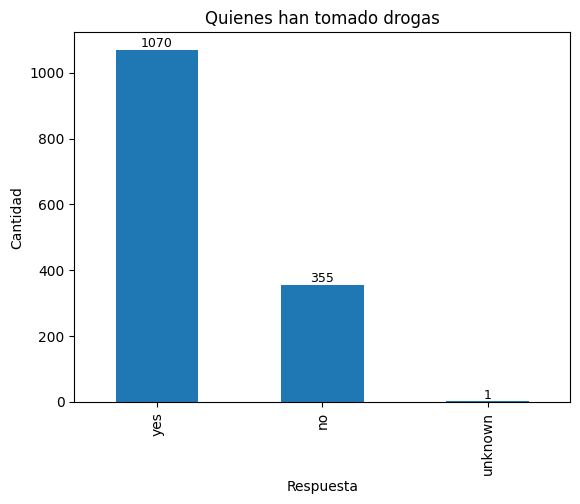

In [11]:
fig, ax = plt.subplots()

df['Alguna vez ha consumido drogas'].value_counts().plot(
    kind='bar',
    ax=ax,
    legend=False
)

ax.set_title("Quienes han tomado drogas")
ax.set_xlabel("Respuesta")
ax.set_ylabel("Cantidad")

add_labels(ax)

plt.show()

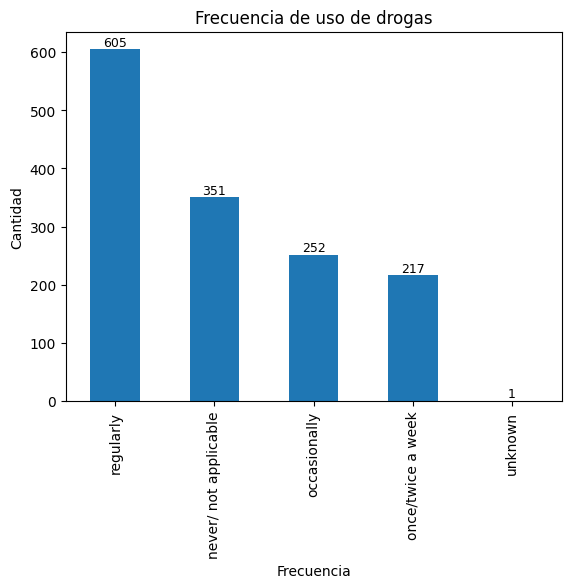

In [12]:
fig, ax = plt.subplots()

df['Frecuencia de uso de drogas'].value_counts().plot(
    kind='bar',
    ax=ax,
    legend=False
)

ax.set_title("Frecuencia de uso de drogas")
ax.set_xlabel("Frecuencia")
ax.set_ylabel("Cantidad")

add_labels(ax)

plt.show()


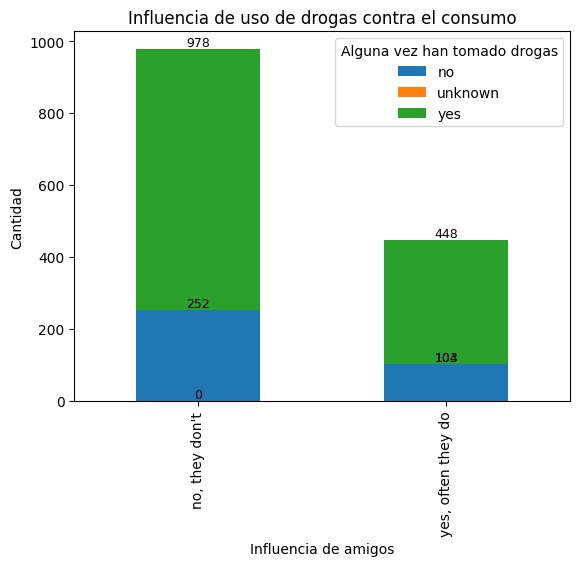

In [14]:
fig, ax = plt.subplots()

pd.crosstab(
    df['Influencia de amigos'],
    df['Alguna vez ha consumido drogas']
).plot(
    kind='bar',
    stacked=True,
    ax=ax
)

ax.set_title("Influencia de uso de drogas contra el consumo")
ax.set_xlabel("Influencia de amigos")
ax.set_ylabel("Cantidad")

ax.legend(title="Alguna vez han tomado drogas")

add_labels(ax)

plt.show()


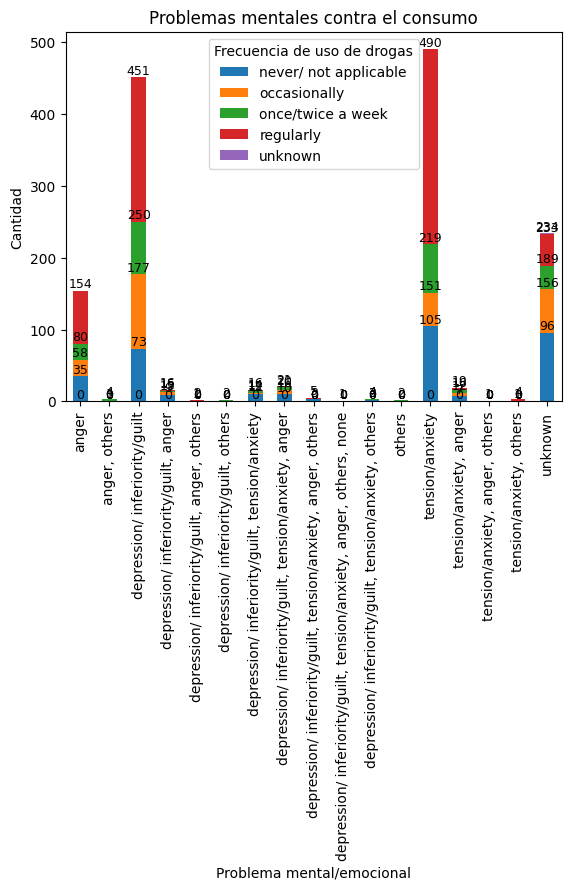

In [15]:
fig, ax = plt.subplots()

pd.crosstab(
    df['Problema mental/emocional'],
    df['Frecuencia de uso de drogas']
).plot(
    kind='bar',
    stacked=True,
    ax=ax
)

ax.set_title("Problemas mentales contra el consumo")
ax.set_xlabel("Problema mental/emocional")
ax.set_ylabel("Cantidad")

ax.legend(title="Frecuencia de uso de drogas")

add_labels(ax)

plt.show()


In [16]:
def risk_profile(row):
    if row['Alguna vez ha consumido drogas'] == 'no':
        return 'low'
    elif row['Frecuencia de uso de drogas'] in ['once', 'rarely', 'sometimes']:
        return 'medium'
    elif row['Frecuencia de uso de drogas'] in ['often', 'regular', 'daily']:
        return 'high'
    else:
        return 'medium'

df['perfil_de_riesgo'] = df.apply(risk_profile, axis=1)

In [17]:
features = [
    'Edad',
    'Género',
    'Educación',
    'Influencia de amigos',
    'número de amigos',
    'Pasa la mayor parte del tiempo',
    'Problema mental/emocional',
    'Pensamientos suicidas',
    'Relación familiar',
    'Persona adicta en la familia',
    'Vive con consumidor de drogas',
    'Fracaso en la vida'
]

In [18]:
X = df[features]
y = df['perfil_de_riesgo']

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   Edad                                         1426 non-null   object
 1   Género                                       1426 non-null   object
 2   Educación                                    1426 non-null   object
 3   Disfrutable con-                             1426 non-null   object
 4   Vive con                                     1426 non-null   object
 5   Conflicto con la ley                         1426 non-null   object
 6   Motivo sobre las drogas                      1426 non-null   object
 7   Pasa la mayor parte del tiempo               1426 non-null   object
 8   Fracaso en la vida                           1426 non-null   object
 9   Problema mental/emocional                    1426 non-null   object
 10  Pensamientos

In [20]:
categorical_features = X.columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

In [22]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        random_state=42,
        class_weight='balanced'
    ))
])

model.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sp

In [23]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'
    ))
])

In [24]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 8, 12, 16],
    'classifier__min_samples_leaf': [1, 3, 5],
    'classifier__min_samples_split': [2, 5, 10]
}

In [25]:

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='f1_macro',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...m_state=42))])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'classifier__max_depth': [None, 8, ...], 'classifier__min_samples_leaf': [1, 3, ...], 'classifier__min_samples_split': [2, 5, ...], 'classifier__n_estimators': [100, 200, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1_macro'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more mess

In [26]:
grid_search.best_params_

{'classifier__max_depth': 12,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__n_estimators': 300}

In [27]:
best_model = grid_search.best_estimator_

y_pred_opt = best_model.predict(X_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_opt))

              precision    recall  f1-score   support

         low       0.63      0.53      0.57        89
      medium       0.85      0.90      0.87       268

    accuracy                           0.80       357
   macro avg       0.74      0.71      0.72       357
weighted avg       0.80      0.80      0.80       357



In [28]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         low       0.63      0.53      0.57        89
      medium       0.85      0.90      0.87       268

    accuracy                           0.80       357
   macro avg       0.74      0.71      0.72       357
weighted avg       0.80      0.80      0.80       357



In [29]:
print("Modelo base")
print(classification_report(y_test, model.predict(X_test)))

print("\nModelo optimizado")
print(classification_report(y_test, y_pred_opt))

Modelo base
              precision    recall  f1-score   support

         low       0.63      0.53      0.57        89
      medium       0.85      0.90      0.87       268

    accuracy                           0.80       357
   macro avg       0.74      0.71      0.72       357
weighted avg       0.80      0.80      0.80       357


Modelo optimizado
              precision    recall  f1-score   support

         low       0.63      0.53      0.57        89
      medium       0.85      0.90      0.87       268

    accuracy                           0.80       357
   macro avg       0.74      0.71      0.72       357
weighted avg       0.80      0.80      0.80       357



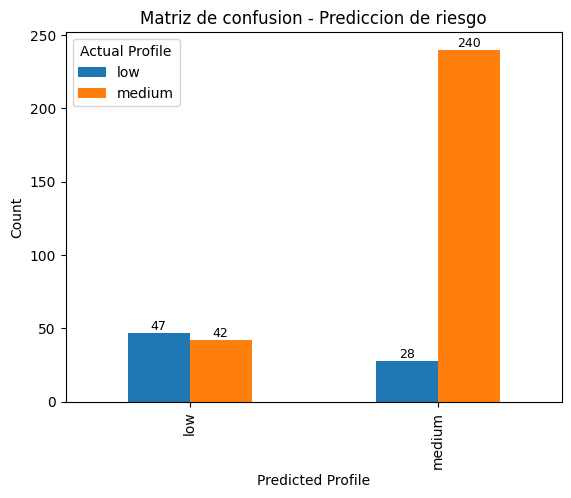

In [30]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
cm_df = pd.DataFrame(
    cm,
    index=model.classes_,
    columns=model.classes_
)

fig, ax = plt.subplots()

cm_df.plot(
    kind='bar',
    ax=ax
)

ax.set_title("Matriz de confusion - Prediccion de riesgo")
ax.set_xlabel("Predicted Profile")
ax.set_ylabel("Count")

ax.legend(title="Actual Profile")

add_labels(ax)

plt.show()

In [31]:
feature_names = model.named_steps['preprocessor'] \
    .named_transformers_['cat'] \
    .get_feature_names_out()

importances = model.named_steps['classifier'].feature_importances_

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)

importance_df.head(10)

,feature,importance
46,Relación familiar_satisfactory,0.113830
43,Relación familiar_average,0.090875
40,Problema mental/emocional_unknown,0.041808
8,Educación_h.s.c / a levels,0.033900
27,Problema mental/emocional_depression/ inferior...,0.032249
53,Vive con consumidor de drogas_yes,0.031163
15,número de amigos_few (1-4),0.031124
12,Educación_undergraduate,0.030016
51,Vive con consumidor de drogas_no,0.027864
16,número de amigos_many (more than 5),0.027557


In [32]:
y_pred = best_model.predict(X_test)

In [33]:
predicciones = pd.DataFrame({
    'Perfil_real': y_test.values,
    'Perfil_predicho': y_pred
})

predicciones.head(10)

,Perfil_real,Perfil_predicho
0,medium,medium
1,low,low
2,low,low
3,low,medium
4,medium,medium
5,medium,medium
6,low,medium
7,medium,medium
8,medium,low
9,medium,medium


In [34]:
predicciones['Perfil_predicho'].value_counts()

Perfil_predicho
medium    282
low        75
Name: count, dtype: int64

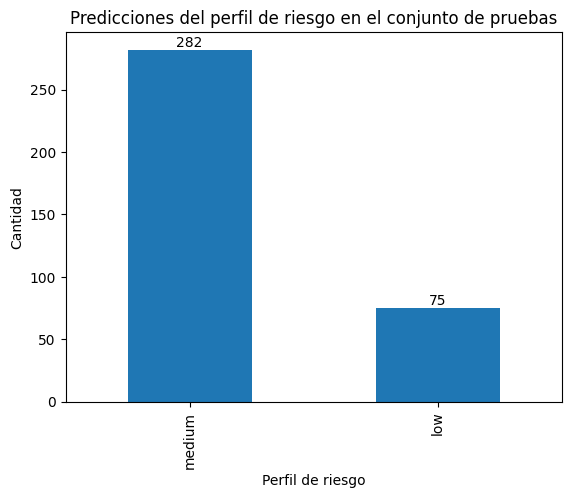

In [35]:
fig, ax = plt.subplots()

predicciones['Perfil_predicho'].value_counts().plot(kind='bar', ax=ax)

ax.set_title("Predicciones del perfil de riesgo en el conjunto de pruebas")
ax.set_xlabel("Perfil de riesgo")
ax.set_ylabel("Cantidad")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

## Graficos

In [36]:
df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_41612\717747095.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip() == "" else x)


In [37]:
df.fillna("Unknown", inplace=True)

In [38]:
for col in df.columns:
    df[col] = df[col].str.strip().str.lower()

sns.set_theme(style="whitegrid")

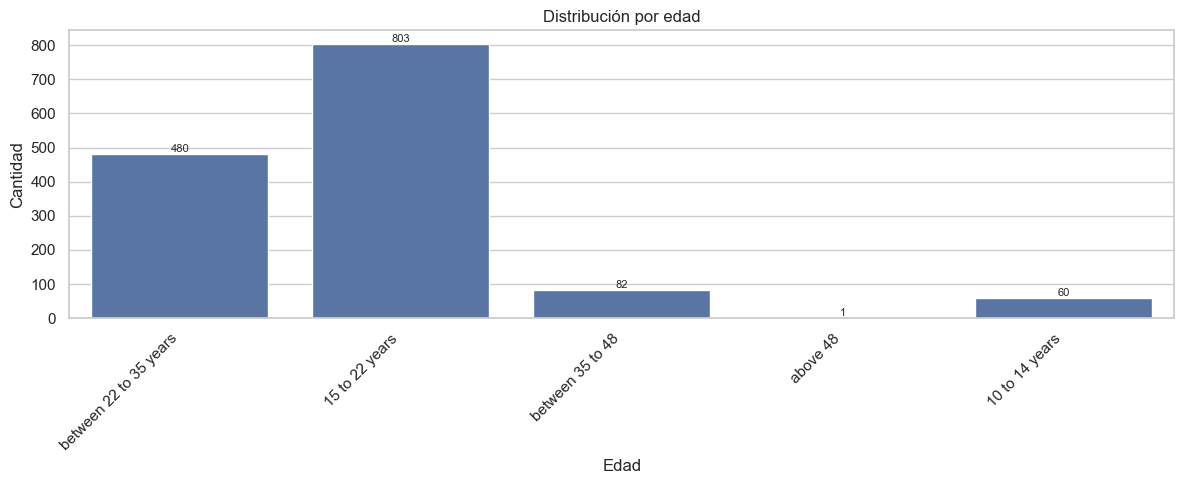

In [40]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=df, x="Edad")
plt.xticks(rotation=45, ha="right")

# Solo hay un container:
ax.bar_label(ax.containers[0], fontsize=8)

plt.title("Distribución por edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

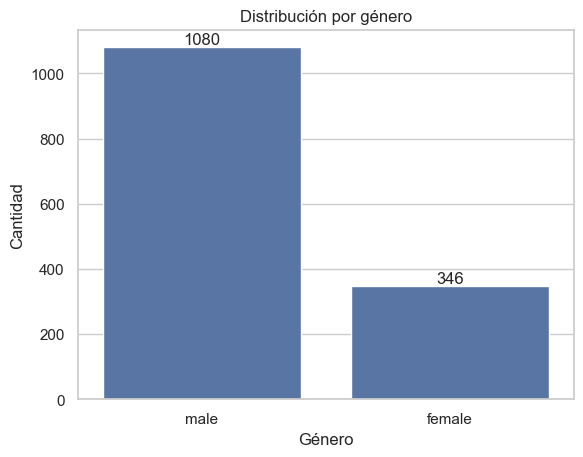

In [41]:
plt.figure()
ax = sns.countplot(data=df, x="Género")
ax.bar_label(ax.containers[0])
plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.show()

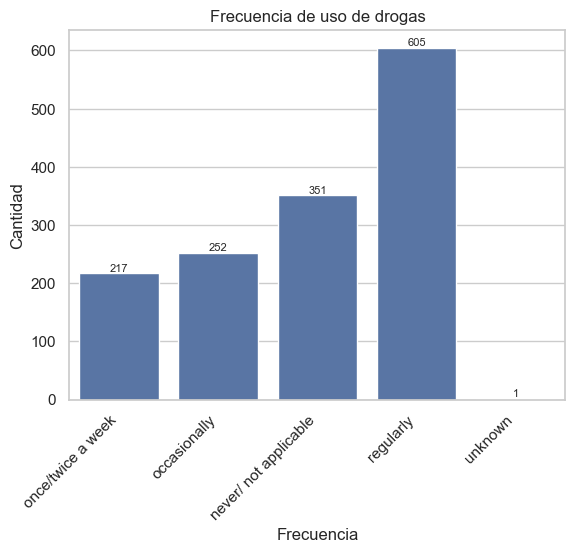

In [42]:
plt.figure()
ax = sns.countplot(data=df, x="Frecuencia de uso de drogas")
plt.xticks(rotation=45, ha="right")
ax.bar_label(ax.containers[0], fontsize=8)
plt.title("Frecuencia de uso de drogas")
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
plt.show()

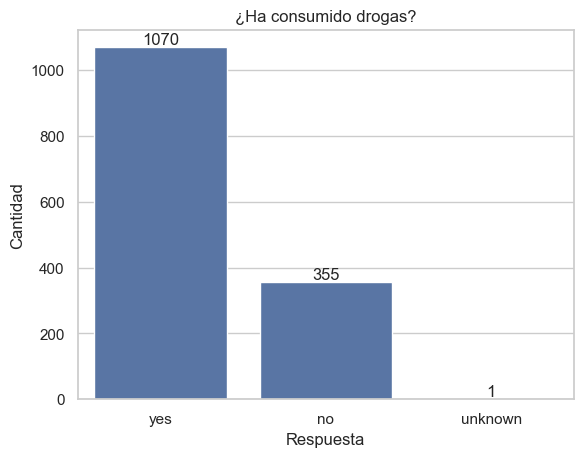

In [43]:
plt.figure()
ax = sns.countplot(data=df, x="Alguna vez ha consumido drogas")
ax.bar_label(ax.containers[0])
plt.title("¿Ha consumido drogas?")
plt.xlabel("Respuesta")
plt.ylabel("Cantidad")
plt.show()

Analisis Bivariable

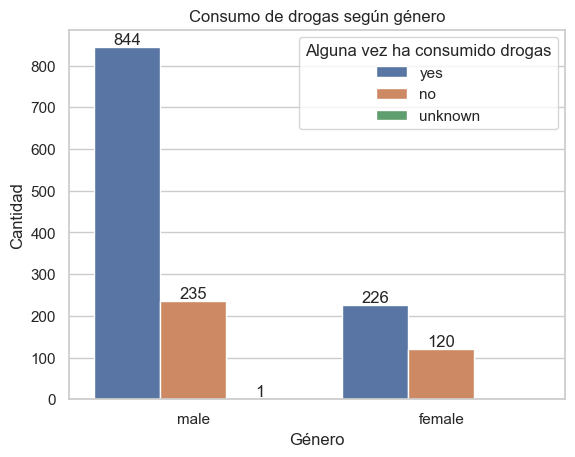

In [45]:
plt.figure()
ax = sns.countplot(
    data=df,
    x="Género",
    hue="Alguna vez ha consumido drogas"
)
for c in ax.containers:
    ax.bar_label(c)
plt.title("Consumo de drogas según género")
plt.xlabel("Género")
plt.ylabel("Cantidad")
plt.legend(title="Alguna vez ha consumido drogas")
plt.show()

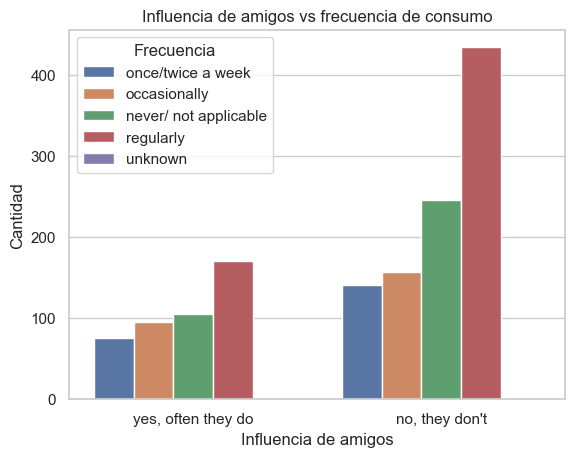

In [46]:
plt.figure()
ax = sns.countplot(
    data=df,
    x="Influencia de amigos",
    hue="Frecuencia de uso de drogas"
)
plt.title("Influencia de amigos vs frecuencia de consumo")
plt.xlabel("Influencia de amigos")
plt.ylabel("Cantidad")
plt.legend(title="Frecuencia")
plt.show()

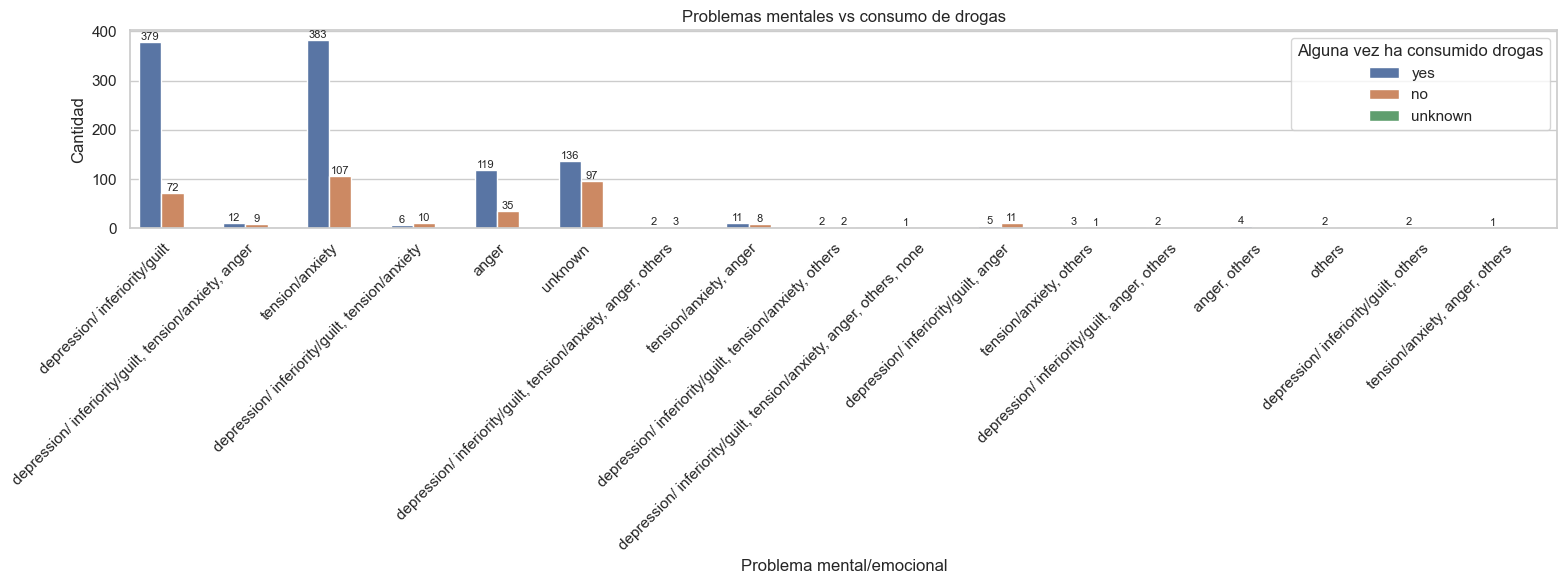

In [47]:
plt.figure(figsize=(16,6))
ax = sns.countplot(
    data=df,
    x="Problema mental/emocional",
    hue="Alguna vez ha consumido drogas"
)

plt.xticks(rotation=45, ha="right")
ax.bar_label(ax.containers[0], fontsize=8)
ax.bar_label(ax.containers[1], fontsize=8)

plt.title("Problemas mentales vs consumo de drogas")
plt.xlabel("Problema mental/emocional")
plt.ylabel("Cantidad")
plt.legend(title="Alguna vez ha consumido drogas")
plt.tight_layout()
plt.show()

Anlisis Multivariable

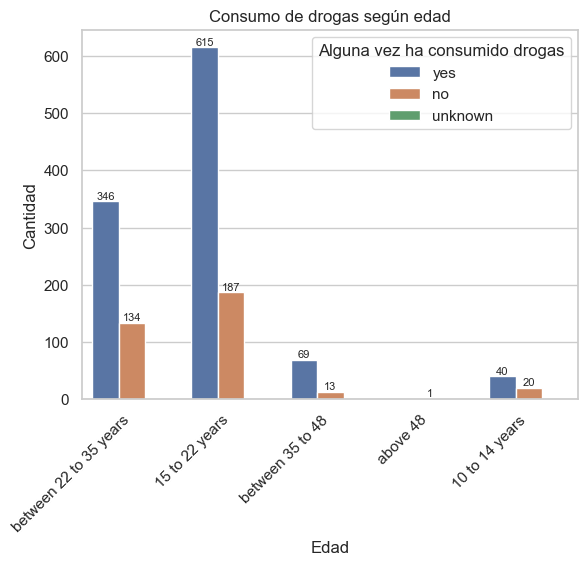

In [48]:
plt.figure()
ax = sns.countplot(
    data=df,
    x="Edad",
    hue="Alguna vez ha consumido drogas"
)
plt.xticks(rotation=45, ha="right")
ax.bar_label(ax.containers[0], fontsize=8)
ax.bar_label(ax.containers[1], fontsize=8)

plt.title("Consumo de drogas según edad")
plt.xlabel("Edad")
plt.ylabel("Cantidad")
plt.legend(title="Alguna vez ha consumido drogas")
plt.show()

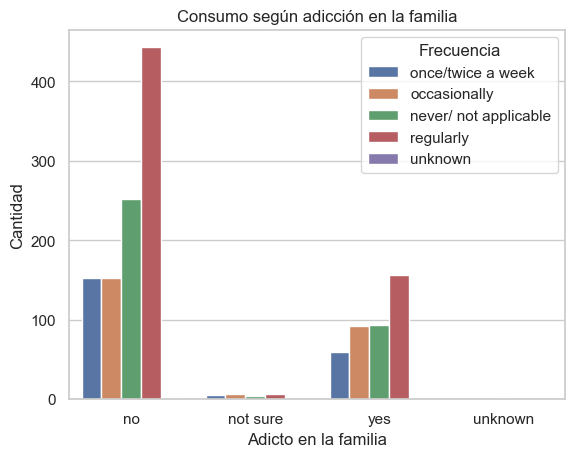

In [49]:
plt.figure()
ax = sns.countplot(
    data=df,
    x="Persona adicta en la familia",
    hue="Frecuencia de uso de drogas"
)
plt.title("Consumo según adicción en la familia")
plt.xlabel("Adicto en la familia")
plt.ylabel("Cantidad")
plt.legend(title="Frecuencia")
plt.show()

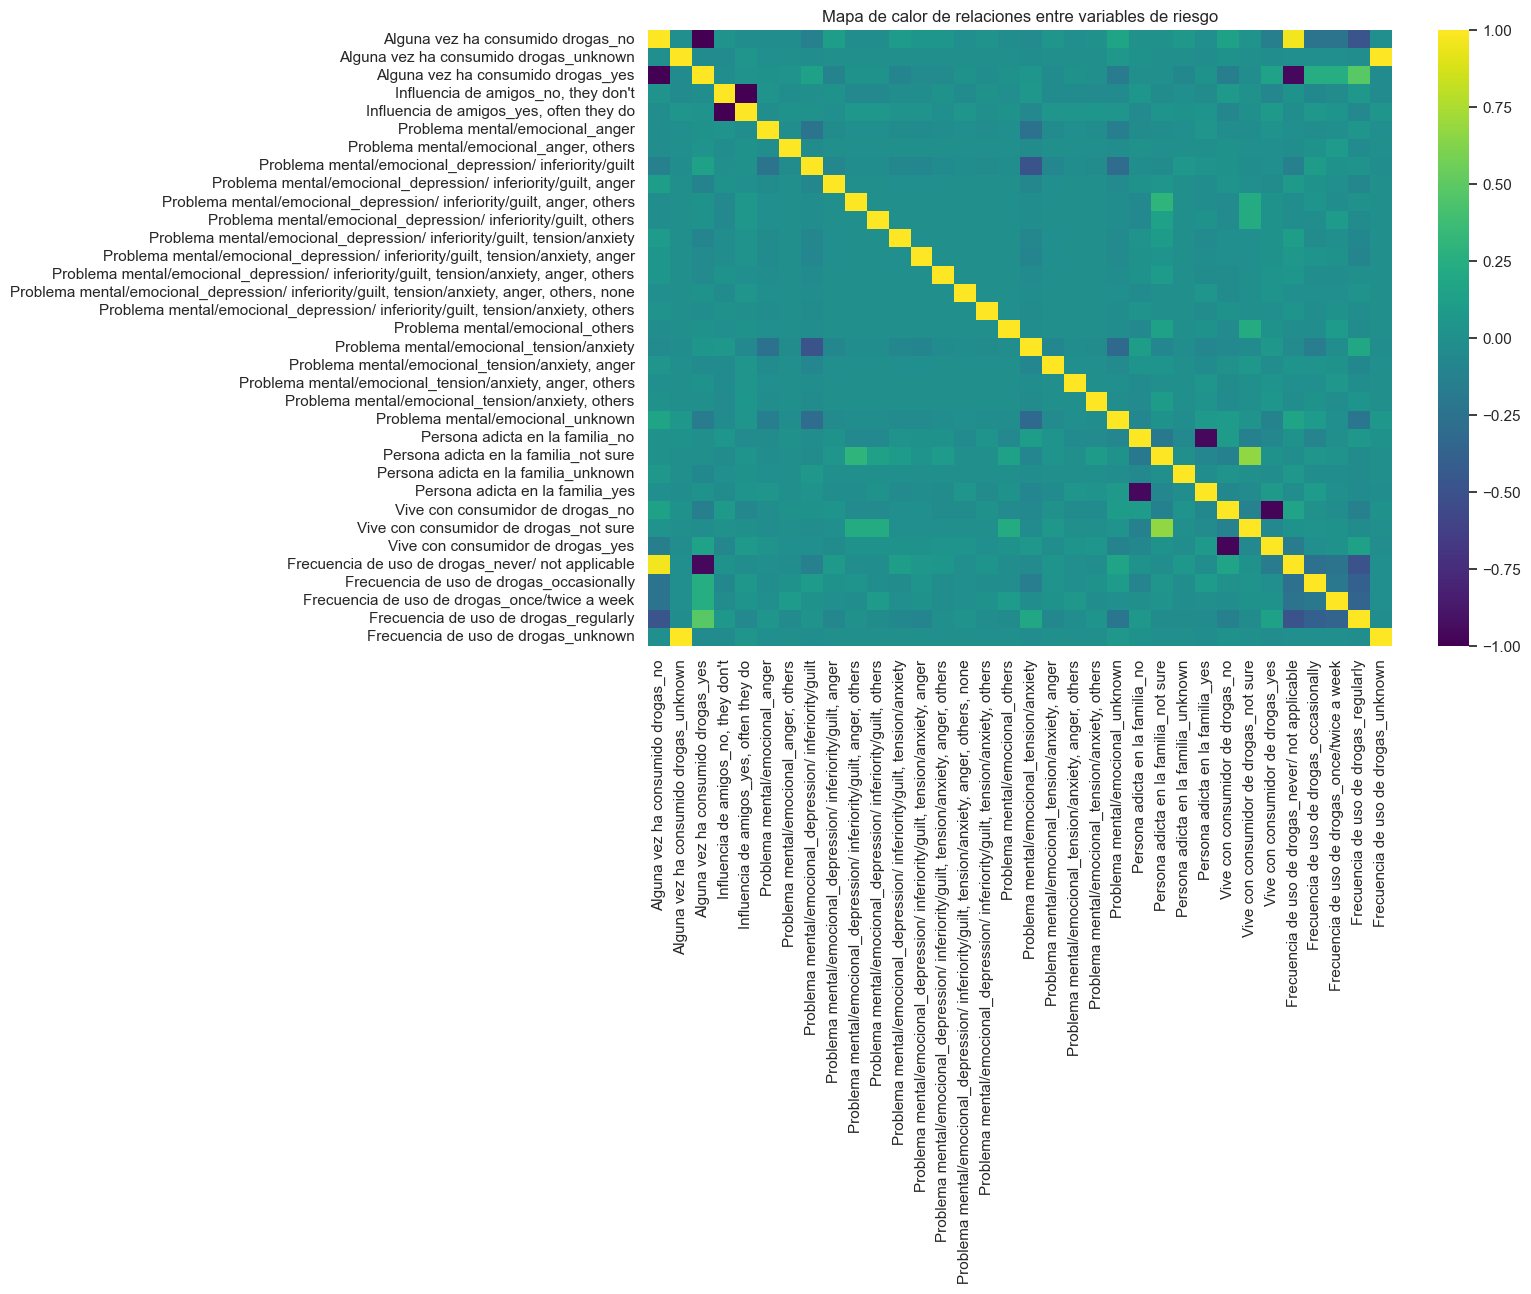

In [50]:
variables_clave = [
    "Alguna vez ha consumido drogas",
    "Influencia de amigos",
    "Problema mental/emocional",
    "Persona adicta en la familia",
    "Vive con consumidor de drogas",
    "Frecuencia de uso de drogas"
]

df_encoded = pd.get_dummies(df[variables_clave])

plt.figure(figsize=(12,8))
corr = df_encoded.corr()
sns.heatmap(corr, cmap="viridis")
plt.title("Mapa de calor de relaciones entre variables de riesgo")
plt.show()

## Pipelines

In [51]:
X = df.drop(columns=['perfil_de_riesgo'])
y = df['perfil_de_riesgo']

In [52]:
categorical_cols = X.columns.tolist()

In [53]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat',
         Pipeline([
             ('imputer', SimpleImputer(strategy='most_frequent')),
             ('encoder', OneHotEncoder(handle_unknown='ignore'))
         ]),
         categorical_cols)
    ]
)

In [54]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestClassifier(
        n_estimators=200,
        max_depth=12,
        min_samples_leaf=3,
        random_state=42,
        class_weight='balanced'
    ))
])


In [55]:


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('model', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains sparse 

In [56]:
y_pred = pipeline.predict(X_test)

## Implementacion de SelectFromModel con RandomForest

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


DIvision de datos.

In [58]:
X = df.drop("perfil_de_riesgo", axis=1)
y = df["perfil_de_riesgo"]

In [59]:
categorical_cols = X.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="drop"
)

Creacion de modelo + RandomForest

In [60]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

feature_selector = SelectFromModel(
    rf,
    threshold="median"   # selección automática según importancia
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("select", feature_selector),
    ("model", rf)
])

In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipeline.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('select', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spa

Evaluacion del modelo

In [62]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         low       1.00      1.00      1.00        72
      medium       1.00      1.00      1.00       214

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286


Confusion Matrix:
 [[ 72   0]
 [  0 214]]


Visualizacion de features

In [63]:
selected_features = pipeline.named_steps["select"].get_support()
selected_count = selected_features.sum()
print(f"Features seleccionadas: {selected_count}")

Features seleccionadas: 51


Visualizacion de la importancia de las características

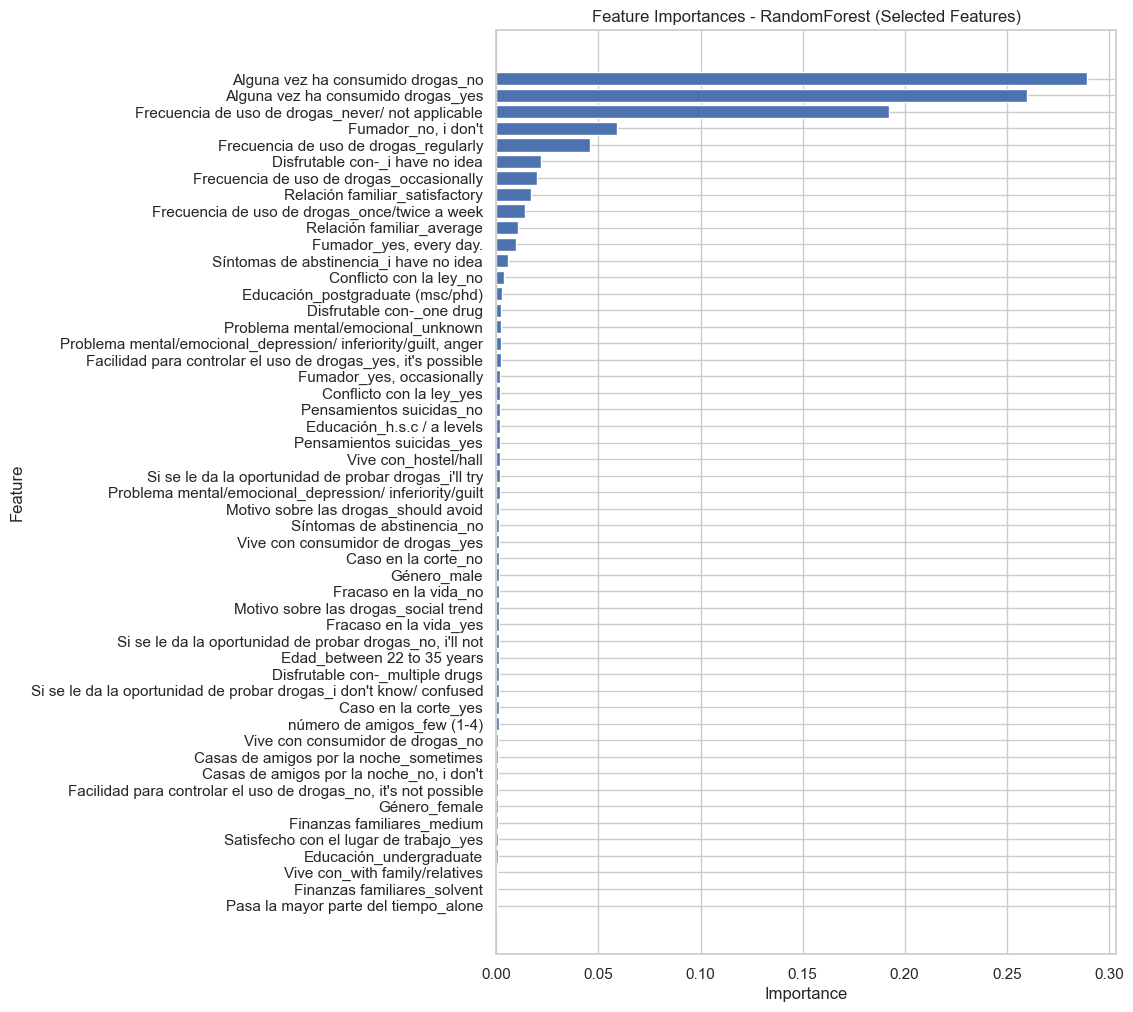

In [64]:
#Obtener el OneHotEncoder aplicado
ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"]
#Obtener nombres expandidos de columnas
ohe_features = ohe.get_feature_names_out(categorical_cols)
#Obtener máscara de features seleccionadas
mask = pipeline.named_steps["select"].get_support()
selected_feature_names = ohe_features[mask]
#Importancias del modelo ya entrenado
importances = pipeline.named_steps["model"].feature_importances_
#Ordenar de mayor a menor
idx = np.argsort(importances)[::-1]
sorted_names = selected_feature_names[idx]
sorted_importances = importances[idx]
#Graficar
plt.figure(figsize=(8, 12))
plt.barh(sorted_names, sorted_importances)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances - RandomForest (Selected Features)")
plt.gca().invert_yaxis()
plt.show()


## Seleccion automatica de features



In [66]:
X = df.drop("perfil_de_riesgo", axis=1)
y = df["perfil_de_riesgo"]


In [67]:
categorical_cols = X.columns.tolist()


Preprocesamiento OneHot en todas las columnas

In [68]:
preprocess = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ],
    remainder="drop"
)


Modelo y selección automática de features

In [69]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

feature_selector = SelectFromModel(
    rf,
    threshold='median'   # ← selección automática
)


Construccion del pipeline correcto

In [70]:
pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("select", feature_selector),
    ("model", rf)
])


Division de datos

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Entrenamiento

In [72]:
pipeline.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocess', ...), ('select', ...), ...]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('cat', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'drop'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transformers contains spa

Evaluacion

In [73]:
y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

         low       1.00      1.00      1.00        72
      medium       1.00      1.00      1.00       214

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286


Confusion Matrix:
 [[ 72   0]
 [  0 214]]


Features seleccionadas

In [74]:
selected_features = pipeline.named_steps["select"].get_support()
print("Features seleccionadas:", selected_features.sum())


Features seleccionadas: 51


In [75]:
# Obtener el OneHotEncoder usado
ohe = pipeline.named_steps["preprocess"].named_transformers_["cat"]

# Obtener todos los nombres expandidos
ohe_features = ohe.get_feature_names_out(categorical_cols)

# Mask de columnas seleccionadas
mask = pipeline.named_steps["select"].get_support()

# Nombres finales
selected_feature_names = ohe_features[mask]

# Mostrar
for feature in selected_feature_names:
    print(feature)

Edad_between 22 to 35 years
Género_female
Género_male
Educación_h.s.c / a levels
Educación_postgraduate (msc/phd)
Educación_undergraduate
Disfrutable con-_i have no idea
Disfrutable con-_multiple drugs
Disfrutable con-_one drug
Vive con_hostel/hall
Vive con_with family/relatives
Conflicto con la ley_no
Conflicto con la ley_yes
Motivo sobre las drogas_should avoid
Motivo sobre las drogas_social trend
Pasa la mayor parte del tiempo_alone
Fracaso en la vida_no
Fracaso en la vida_yes
Problema mental/emocional_depression/ inferiority/guilt
Problema mental/emocional_depression/ inferiority/guilt, anger
Problema mental/emocional_unknown
Pensamientos suicidas_no
Pensamientos suicidas_yes
Relación familiar_average
Relación familiar_satisfactory
Finanzas familiares_medium
Finanzas familiares_solvent
número de amigos_few (1-4)
Síntomas de abstinencia_i have no idea
Síntomas de abstinencia_no
Casas de amigos por la noche_no, i don't
Casas de amigos por la noche_sometimes
Satisfecho con el lugar de

## Diagnóstico complementario y reducción de dimensionalidad

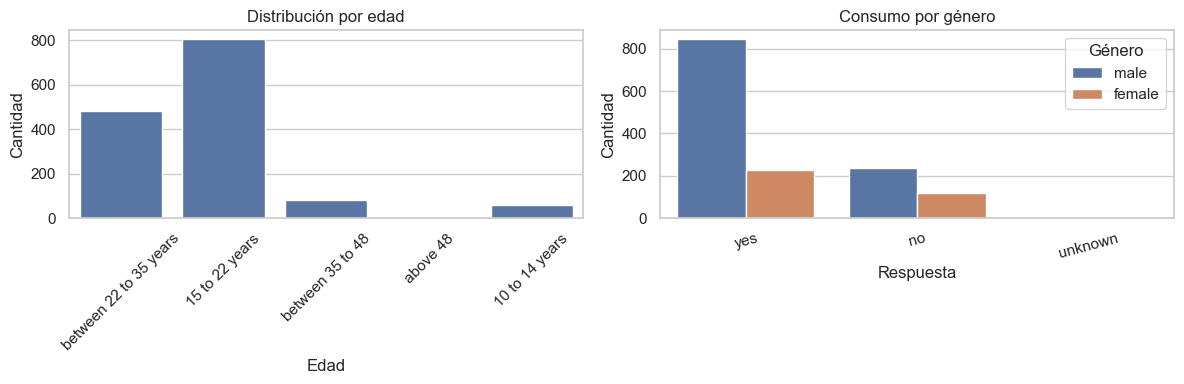

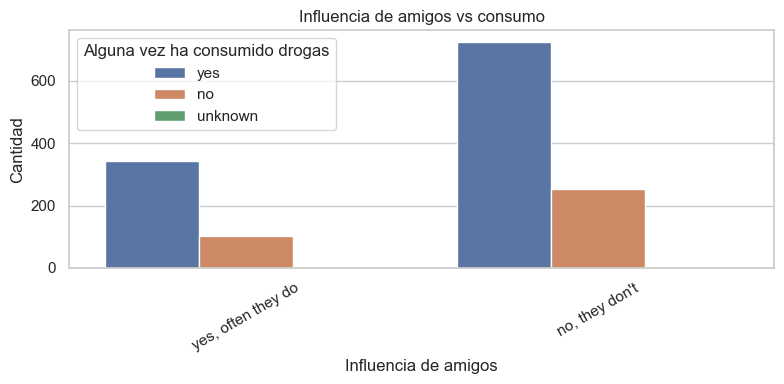

In [77]:
# Exploración univariante y bivariante
# Permite visualizar distribuciones y relaciones clave que sirven para entender el consumo de drogas y decidir la limpíeza y transformación de los datos, facilitando la deteccion
# de categorias inconsistentes, desbalances o valores atipicos.
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(data=df, x="Edad", ax=axes[0])
axes[0].set_title("Distribución por edad")

axes[0].set_xlabel("Edad")
axes[0].set_ylabel("Cantidad")
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data=df, x="Alguna vez ha consumido drogas", hue="Género", ax=axes[1])
axes[1].set_title("Consumo por género")
axes[1].set_xlabel("Respuesta")
axes[1].set_ylabel("Cantidad")
axes[1].legend(title="Género")
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Influencia de amigos", hue="Alguna vez ha consumido drogas")
plt.title("Influencia de amigos vs consumo")
plt.xlabel("Influencia de amigos")
plt.ylabel("Cantidad")
plt.legend(title="Alguna vez ha consumido drogas")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

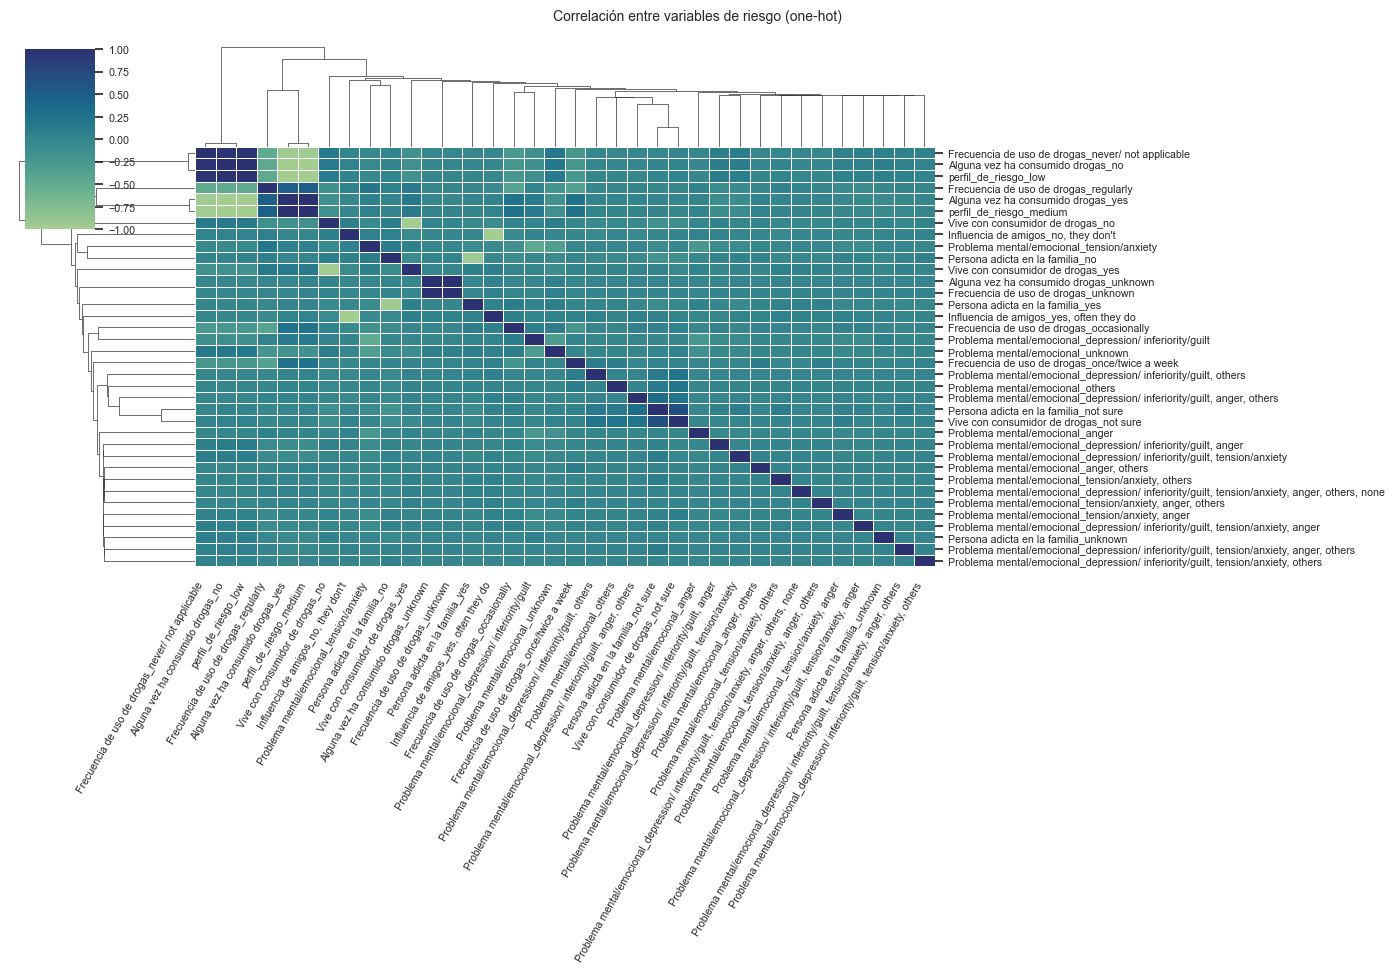

In [78]:
# Exploración multivariante con mapa de calor (clustermap para mejor legibilidad)
# El uso de clustermap permite reducir el solapamiento de etiquetas y agrupar variables, permitnedo ver vloques de correlacion entre factores de riesgo y risk_profile.
# Tambien facilita a decidir que variables son redundantes, para considerar la reduccion de dimensionalidad.
vars_corr = [
    "Alguna vez ha consumido drogas",
    "Frecuencia de uso de drogas",
    "Influencia de amigos",
    "Problema mental/emocional",
    "Persona adicta en la familia",
    "Vive con consumidor de drogas",
    "perfil_de_riesgo"
]

corr_df = pd.get_dummies(df[vars_corr])
corr_matrix = corr_df.corr()

# Escala de fuente más pequeña y dendrograma para separar etiquetas
sns.set(font_scale=0.7)
g = sns.clustermap(
    corr_matrix,
    cmap="crest",
    center=0,
    figsize=(14, 10),
    linewidths=0.5,
    xticklabels=True,
    yticklabels=True
)
plt.setp(g.ax_heatmap.get_xticklabels(), rotation=60, ha="right")
plt.setp(g.ax_heatmap.get_yticklabels(), rotation=0)
g.fig.suptitle("Correlación entre variables de riesgo (one-hot)", y=1.02)
plt.show()

# Devolver la escala de fuente por defecto para futuras gráficas
sns.set(font_scale=1)

In [79]:
# ==========================
# 1) Pipeline con selección de variables (SelectFromModel + RandomForest)
# ==========================
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pandas as pd

selector = SelectFromModel(
    RandomForestClassifier(
        n_estimators=300,
        max_depth=12,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ),
    threshold="median"
)

pipeline_fs = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('classifier', RandomForestClassifier(
        n_estimators=200,   # <-- OJO: sin 'z'
        max_depth=12,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    ))
])

pipeline_fs.fit(X_train, y_train)

y_pred_fs = pipeline_fs.predict(X_test)
print("=== Pipeline con solo selección de features (SelectFromModel) ===")
print(classification_report(y_test, y_pred_fs))


# ==========================
# 2) Inspección de variables retenidas por el selector
# ==========================
feature_names = pipeline_fs.named_steps['preprocessor'].get_feature_names_out()
support_mask = pipeline_fs.named_steps['selector'].get_support()
selected_features = feature_names[support_mask]

print(f"Total de variables codificadas: {len(feature_names)}")
print(f"Variables seleccionadas: {len(selected_features)}")

# Mostrar algunas seleccionadas
pd.Series(selected_features).head(100)


# ==========================
# 3) Calcular n_features_sel (para no tener NameError)
# ==========================
X_train_sel = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', selector)
]).fit_transform(X_train, y_train)

n_features_sel = X_train_sel.shape[1]


# ==========================
# 4) Pipeline integrado con reducción de dimensionalidad (SelectFromModel + SVD + LogisticRegression)
# ==========================
from sklearn.decomposition import TruncatedSVD
from sklearn.linear_model import LogisticRegression

n_components = 30
# (opcional) asegurar que no exceda las features seleccionadas
if n_features_sel <= 1:
    n_components = 1
else:
    n_components = min(n_components, n_features_sel - 1)

svd = TruncatedSVD(n_components=n_components, random_state=42)

pipeline_fs_svd = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', selector),
    ('svd', svd),
    ('classifier', LogisticRegression(
        max_iter=2000,
        class_weight='balanced'
    ))
])

pipeline_fs_svd.fit(X_train, y_train)

y_pred_svd = pipeline_fs_svd.predict(X_test)
print("\n=== Pipeline con selección + reducción dimensional (SVD) ===")
print(classification_report(y_test, y_pred_svd))

print("Dimensiones originales después del selector:", n_features_sel)
print("Dimensiones finales después de SVD:", n_components)


=== Pipeline con solo selección de features (SelectFromModel) ===
              precision    recall  f1-score   support

         low       1.00      1.00      1.00        72
      medium       1.00      1.00      1.00       214

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286

Total de variables codificadas: 102
Variables seleccionadas: 51

=== Pipeline con selección + reducción dimensional (SVD) ===
              precision    recall  f1-score   support

         low       1.00      1.00      1.00        72
      medium       1.00      1.00      1.00       214

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286

Dimensiones originales después del selector: 51
Dimensiones finales después de SVD: 30


## AVANCE 2 SEMANA 19 DE ENERO

In [80]:
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix
# ==========================
#  1. OBTENER PREDICCIONES DE TODOS LOS MODELOS, - Calcular y analizar métricas por clase: Precision, Recall, F1-Score para cada categoría (low, medium, high) Support (cantidad de muestras por clase)
# ==========================

# Modelo 1: Modelo base optimizado (GridSearchCV)
y_pred_base = best_model.predict(X_test)

# Modelo 2: Pipeline con SelectFromModel
y_pred_fs = pipeline_fs.predict(X_test)

# Modelo 3: Pipeline con SelectFromModel + SVD
y_pred_svd = pipeline_fs_svd.predict(X_test)


In [81]:
def calcular_metricas_detalladas(y_true, y_pred, nombre_modelo):
    """
    Calcula y retorna métricas detalladas por clase
    """
    precision, recall, f1, support = precision_recall_fscore_support(
        y_true,
        y_pred,
        labels=['low', 'medium'],
        zero_division=0
    )

    metrics_df = pd.DataFrame({
        'Modelo': nombre_modelo,
        'Clase': ['low', 'medium'],
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Support': support
    })

    return metrics_df

In [82]:
metricas_base = calcular_metricas_detalladas(y_test, y_pred_base, 'Modelo Base (GridSearch)')
metricas_fs = calcular_metricas_detalladas(y_test, y_pred_fs, 'SelectFromModel + RF')
metricas_svd = calcular_metricas_detalladas(y_test, y_pred_svd, 'SelectFromModel + SVD + LR')

# Combinar todas las métricas
todas_metricas = pd.concat([metricas_base, metricas_fs, metricas_svd], ignore_index=True)

In [83]:
# ==========================
# TABLA COMPARATIVA
# ==========================
modelos = [
    ('Modelo Base (GridSearch)', y_pred_base),
    ('SelectFromModel + RF', y_pred_fs),
    ('SelectFromModel + SVD + LR', y_pred_svd)
]

for nombre_modelo, y_pred in modelos:
    print("=" * 100)
    print(f"ANÁLISIS DETALLADO: {nombre_modelo}")
    print("=" * 100)
    print(classification_report(y_test, y_pred, target_names=['low', 'medium']))
    print()



ANÁLISIS DETALLADO: Modelo Base (GridSearch)
              precision    recall  f1-score   support

         low       0.81      0.79      0.80        72
      medium       0.93      0.94      0.93       214

    accuracy                           0.90       286
   macro avg       0.87      0.87      0.87       286
weighted avg       0.90      0.90      0.90       286


ANÁLISIS DETALLADO: SelectFromModel + RF
              precision    recall  f1-score   support

         low       1.00      1.00      1.00        72
      medium       1.00      1.00      1.00       214

    accuracy                           1.00       286
   macro avg       1.00      1.00      1.00       286
weighted avg       1.00      1.00      1.00       286


ANÁLISIS DETALLADO: SelectFromModel + SVD + LR
              precision    recall  f1-score   support

         low       1.00      1.00      1.00        72
      medium       1.00      1.00      1.00       214

    accuracy                           1.00    

In [84]:
# Extraer importancias de features del modelo optimizado
print("\nMODELO BASE (GridSearchCV)")
print("-" * 100)

# Obtener nombres de features después del OneHotEncoder
feature_names_base = best_model.named_steps['preprocessor'].get_feature_names_out()

# Obtener importancias del modelo
importances_base = best_model.named_steps['classifier'].feature_importances_

# Crear DataFrame con las importancias
importance_df_base = pd.DataFrame({
    'Feature': feature_names_base,
    'Importance': importances_base
}).sort_values(by='Importance', ascending=False)

print(f"Total de features: {len(feature_names_base)}")
print(f"\nTop 20 Features más importantes:\n")
print(importance_df_base.head(20).to_string(index=False))


MODELO BASE (GridSearchCV)
----------------------------------------------------------------------------------------------------
Total de features: 56

Top 20 Features más importantes:

                                                     Feature  Importance
                         cat__Relación familiar_satisfactory    0.115641
                              cat__Relación familiar_average    0.090599
                      cat__Problema mental/emocional_unknown    0.043429
                             cat__Educación_h.s.c / a levels    0.033496
cat__Problema mental/emocional_depression/ inferiority/guilt    0.031712
                      cat__Vive con consumidor de drogas_yes    0.031629
                             cat__número de amigos_few (1-4)    0.030309
                                cat__Educación_undergraduate    0.030245
                       cat__Vive con consumidor de drogas_no    0.027237
                    cat__número de amigos_many (more than 5)    0.027186
           

In [85]:
print("\nPIPELINE CON SELECTFROMMODEL + RANDOM FOREST")
print("-" * 100)
all_features = pipeline_fs.named_steps['preprocessor'].get_feature_names_out()
selected_mask = pipeline_fs.named_steps['selector'].get_support()
selected_features = all_features[selected_mask]
importances_fs = pipeline_fs.named_steps['classifier'].feature_importances_
importance_df_fs = pd.DataFrame({
    'Feature': selected_features,
    'Importance': importances_fs
}).sort_values(by='Importance', ascending=False)

print(f"Total de features originales: {len(all_features)}")
print(f"Features seleccionadas por SelectFromModel: {len(selected_features)}")
print(f"\nTop 20 Features más importantes (de las seleccionadas):\n")
print(importance_df_fs.head(20).to_string(index=False))


PIPELINE CON SELECTFROMMODEL + RANDOM FOREST
----------------------------------------------------------------------------------------------------
Total de features originales: 102
Features seleccionadas por SelectFromModel: 51

Top 20 Features más importantes (de las seleccionadas):

                                                            Feature  Importance
                             cat__Alguna vez ha consumido drogas_no    0.272557
                            cat__Alguna vez ha consumido drogas_yes    0.242075
             cat__Frecuencia de uso de drogas_never/ not applicable    0.185883
                         cat__Frecuencia de uso de drogas_regularly    0.075626
                                           cat__Fumador_no, i don't    0.059085
                      cat__Frecuencia de uso de drogas_occasionally    0.022235
                                cat__Relación familiar_satisfactory    0.019981
                               cat__Disfrutable con-_i have no idea    0.0

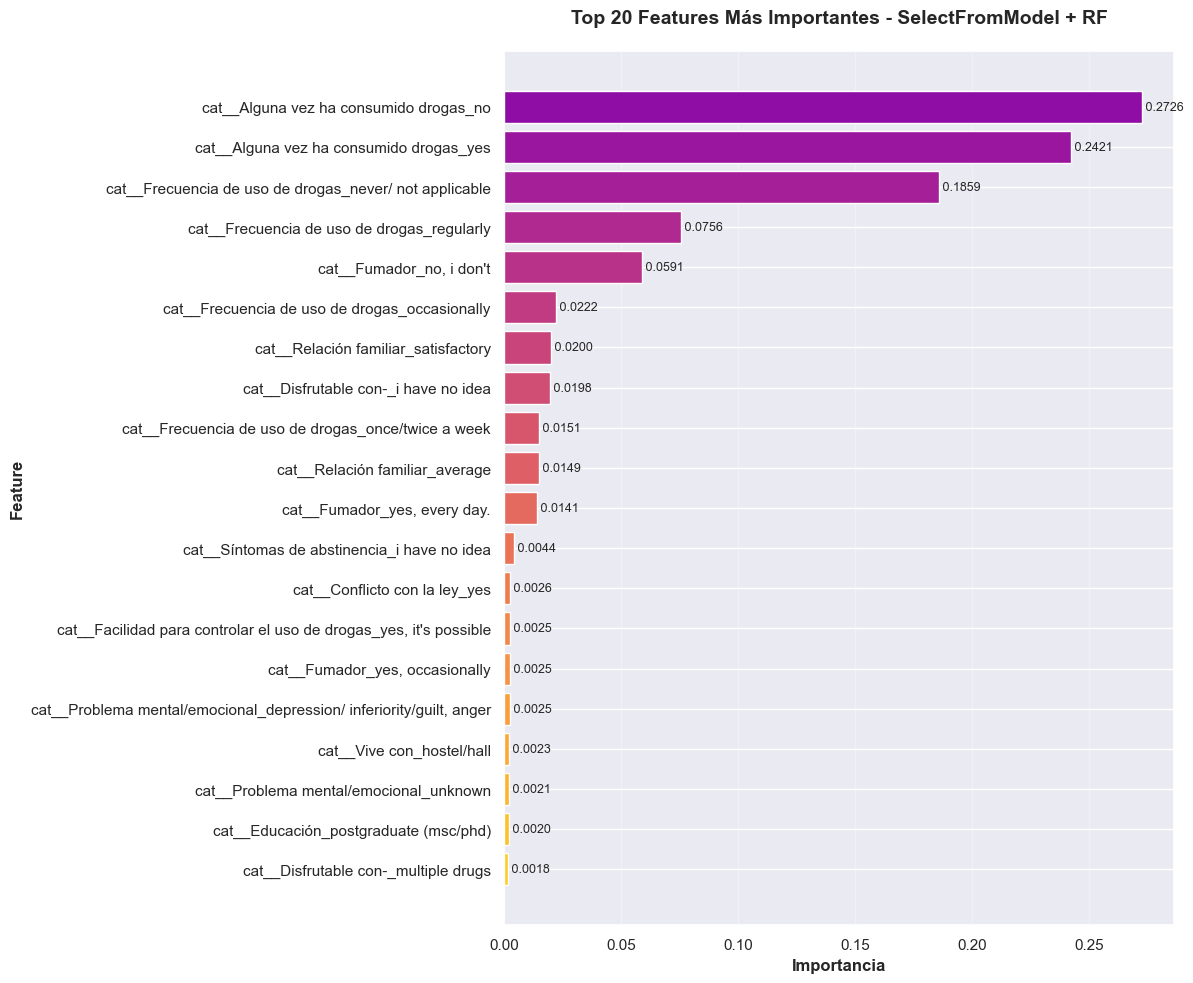

In [86]:
# ==========================
# 3. VISUALIZACIÓN: TOP 20 FEATURES - SELECTFROMMODEL
# ==========================

fig, ax = plt.subplots(figsize=(12, 10))

top_n = 20
top_features_fs = importance_df_fs.head(top_n)

colors = plt.cm.plasma(np.linspace(0.3, 0.9, top_n))
bars = ax.barh(range(top_n), top_features_fs['Importance'], color=colors)

ax.set_yticks(range(top_n))
ax.set_yticklabels(top_features_fs['Feature'])
ax.invert_yaxis()
ax.set_xlabel('Importancia', fontsize=12, fontweight='bold')
ax.set_ylabel('Feature', fontsize=12, fontweight='bold')
ax.set_title(f'Top {top_n} Features Más Importantes - SelectFromModel + RF',
             fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='x', alpha=0.3)

# Añadir valores
for i, (bar, importance) in enumerate(zip(bars, top_features_fs['Importance'])):
    ax.text(importance, i, f' {importance:.4f}',
            va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [87]:
# ==========================
# 4. CURVAS PRECISION-RECALL POR CLASE
# ==========================
from sklearn.preprocessing import label_binarize
# Obtener clases únicas
clases = sorted(y_test.unique())
n_clases = len(clases)

# Binarizar las etiquetas (necesario para curvas PR)
y_test_bin = label_binarize(y_test, classes=clases)

if n_clases == 2:
    y_test_bin = np.hstack([1 - y_test_bin, y_test_bin])



Curvas Precision-Recall - Modelo Base
----------------------------------------------------------------------------------------------------
  Clase 'low': Average Precision = 0.8945
  Clase 'medium': Average Precision = 0.9856


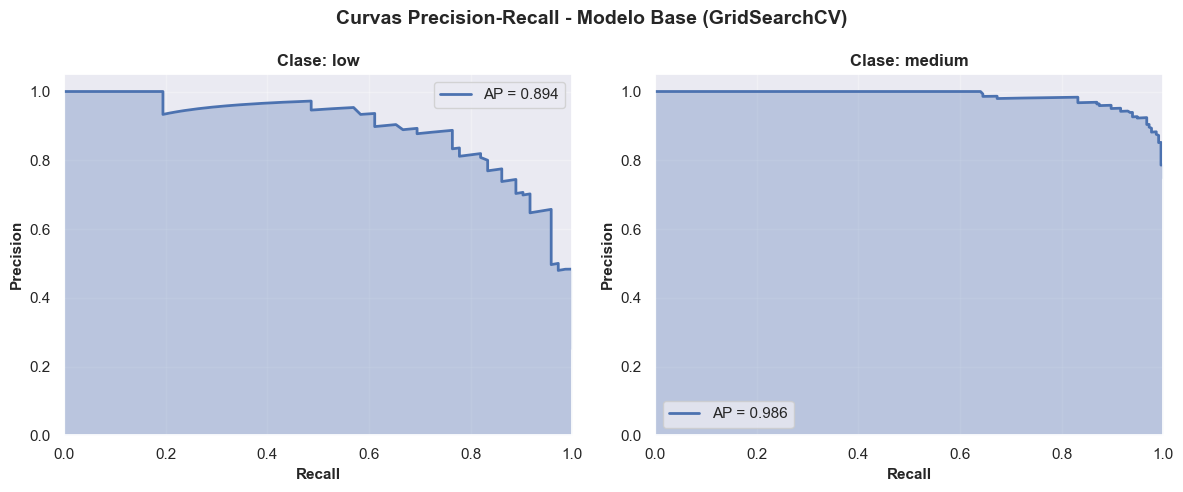

In [88]:
# ==========================
# 1. MODELO BASE (GridSearchCV)
# ==========================
from sklearn.metrics import precision_recall_curve, average_precision_score
print("\nCurvas Precision-Recall - Modelo Base")
print("-" * 100)

# Obtener probabilidades
y_score_base = best_model.predict_proba(X_test)

# Crear figura para Modelo Base
fig, axes = plt.subplots(1, n_clases, figsize=(6*n_clases, 5))
if n_clases == 1:
    axes = [axes]
fig.suptitle('Curvas Precision-Recall - Modelo Base (GridSearchCV)',
             fontsize=14, fontweight='bold')

# Calcular y graficar para cada clase
ap_scores_base = {}
for i, clase in enumerate(clases):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_base[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score_base[:, i])
    ap_scores_base[clase] = ap

    ax = axes[i] if n_clases > 1 else axes[0]
    ax.plot(recall, precision, linewidth=2, label=f'AP = {ap:.3f}')
    ax.fill_between(recall, precision, alpha=0.3)
    ax.set_xlabel('Recall', fontsize=11, fontweight='bold')
    ax.set_ylabel('Precision', fontsize=11, fontweight='bold')
    ax.set_title(f'Clase: {clase}', fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    print(f"  Clase '{clase}': Average Precision = {ap:.4f}")

plt.tight_layout()
plt.show()


2Curvas Precision-Recall - SelectFromModel + RF
----------------------------------------------------------------------------------------------------
  Clase 'low': Average Precision = 1.0000
  Clase 'medium': Average Precision = 1.0000


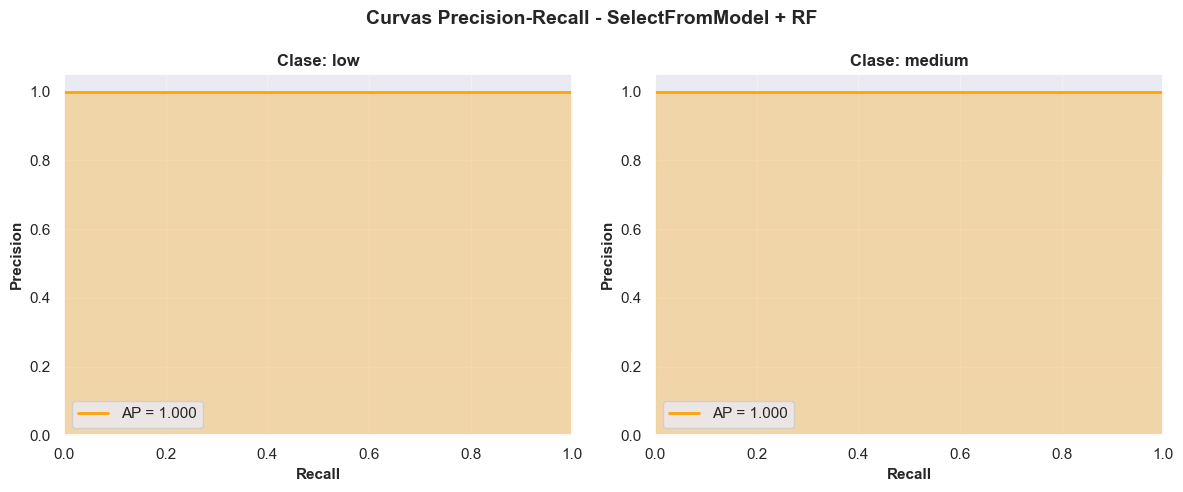

In [89]:
# ==========================
# 2. SELECTFROMMODEL + RF
# ==========================

print("\n2Curvas Precision-Recall - SelectFromModel + RF")
print("-" * 100)
y_score_fs = pipeline_fs.predict_proba(X_test)

fig, axes = plt.subplots(1, n_clases, figsize=(6*n_clases, 5))
if n_clases == 1:
    axes = [axes]
fig.suptitle('Curvas Precision-Recall - SelectFromModel + RF',
             fontsize=14, fontweight='bold')

ap_scores_fs = {}
for i, clase in enumerate(clases):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score_fs[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score_fs[:, i])
    ap_scores_fs[clase] = ap

    ax = axes[i] if n_clases > 1 else axes[0]
    ax.plot(recall, precision, linewidth=2, label=f'AP = {ap:.3f}', color='orange')
    ax.fill_between(recall, precision, alpha=0.3, color='orange')
    ax.set_xlabel('Recall', fontsize=11, fontweight='bold')
    ax.set_ylabel('Precision', fontsize=11, fontweight='bold')
    ax.set_title(f'Clase: {clase}', fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

    print(f"  Clase '{clase}': Average Precision = {ap:.4f}")

plt.tight_layout()
plt.show()


Comparación de Curvas Precision-Recall
----------------------------------------------------------------------------------------------------


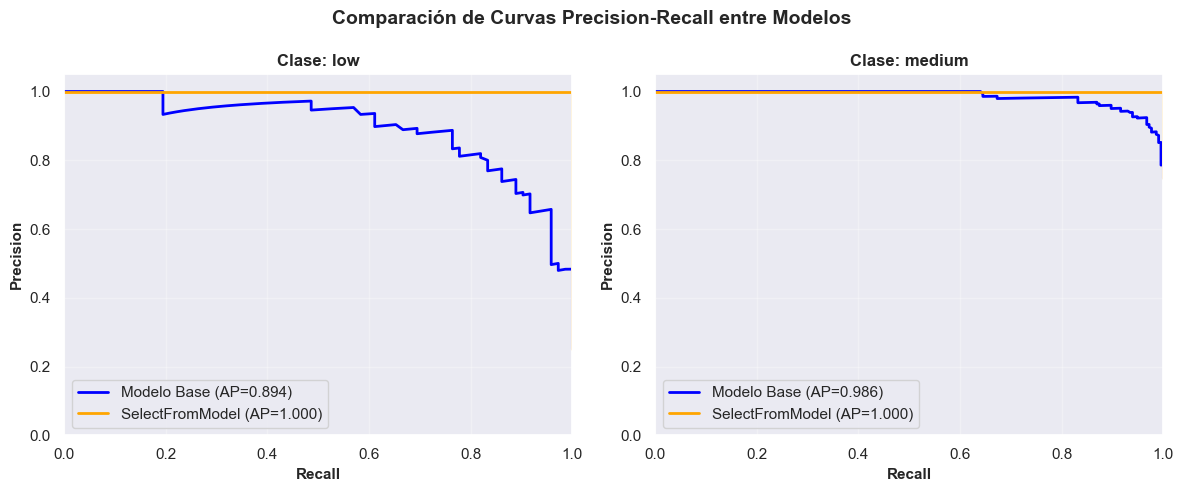

In [90]:
# ==========================
# 3. COMPARACIÓN DE CURVAS PR ENTRE MODELOS
# ==========================

print("\nComparación de Curvas Precision-Recall")
print("-" * 100)

fig, axes = plt.subplots(1, n_clases, figsize=(6*n_clases, 5))
if n_clases == 1:
    axes = [axes]
fig.suptitle('Comparación de Curvas Precision-Recall entre Modelos',
             fontsize=14, fontweight='bold')

for i, clase in enumerate(clases):
    ax = axes[i] if n_clases > 1 else axes[0]

    # Modelo Base
    precision_base, recall_base, _ = precision_recall_curve(y_test_bin[:, i], y_score_base[:, i])
    ap_base = ap_scores_base[clase]
    ax.plot(recall_base, precision_base, linewidth=2,
            label=f'Modelo Base (AP={ap_base:.3f})', color='blue')

    # SelectFromModel
    precision_fs, recall_fs, _ = precision_recall_curve(y_test_bin[:, i], y_score_fs[:, i])
    ap_fs = ap_scores_fs[clase]
    ax.plot(recall_fs, precision_fs, linewidth=2,
            label=f'SelectFromModel (AP={ap_fs:.3f})', color='orange')

    ax.set_xlabel('Recall', fontsize=11, fontweight='bold')
    ax.set_ylabel('Precision', fontsize=11, fontweight='bold')
    ax.set_title(f'Clase: {clase}', fontsize=12, fontweight='bold')
    ax.legend(loc='best')
    ax.grid(True, alpha=0.3)
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])

plt.tight_layout()
plt.show()


In [91]:
# Calcular estadísticos: media, desviación estándar de métricas
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score
scoring = {
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted',
    'accuracy': 'accuracy'
}

In [92]:
# ==========================
# 1. MODELO BASE - media, desviación estándar de métricas
# ==========================
cv_results_base = cross_validate(
    best_model,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

print("\nRESULTADOS:")
for metric in scoring.keys():
    scores = cv_results_base[f'test_{metric}']
    print(f"  {metric}:")
    print(f"    Media: {scores.mean():.4f}")
    print(f"    Desviación Estándar: {scores.std():.4f}")
    print(f"    Min: {scores.min():.4f}, Max: {scores.max():.4f}")


RESULTADOS:
  precision_macro:
    Media: 0.7894
    Desviación Estándar: 0.0350
    Min: 0.7455, Max: 0.8383
  recall_macro:
    Media: 0.7494
    Desviación Estándar: 0.0303
    Min: 0.7105, Max: 0.7982
  f1_macro:
    Media: 0.7640
    Desviación Estándar: 0.0292
    Min: 0.7266, Max: 0.8035
  precision_weighted:
    Media: 0.8296
    Desviación Estándar: 0.0219
    Min: 0.8006, Max: 0.8550
  recall_weighted:
    Media: 0.8351
    Desviación Estándar: 0.0207
    Min: 0.8114, Max: 0.8596
  f1_weighted:
    Media: 0.8292
    Desviación Estándar: 0.0207
    Min: 0.8027, Max: 0.8539
  accuracy:
    Media: 0.8351
    Desviación Estándar: 0.0207
    Min: 0.8114, Max: 0.8596


In [93]:
# ==========================
# 2. SELECTFROMMODEL + RF
# ==========================

print("\n\nSELECTFROMMODEL + RF")
print("-" * 100)

cv_results_fs = cross_validate(
    pipeline_fs,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

print("\nRESULTADOS:")
print("\nMétricas de Test (Validación):")
for metric in scoring.keys():
    scores = cv_results_fs[f'test_{metric}']
    print(f"  {metric}:")
    print(f"    Media: {scores.mean():.4f}")
    print(f"    Desviación Estándar: {scores.std():.4f}")
    print(f"    Min: {scores.min():.4f}, Max: {scores.max():.4f}")



SELECTFROMMODEL + RF
----------------------------------------------------------------------------------------------------

RESULTADOS:

Métricas de Test (Validación):
  precision_macro:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  recall_macro:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  f1_macro:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  precision_weighted:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  recall_weighted:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  f1_weighted:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  accuracy:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000


In [94]:
# ==========================
# 3. SELECTFROMMODEL + SVD
# ==========================
print("\n\nSELECTFROMMODEL + SVD + LR ")
print("-" * 100)

cv_results_svd = cross_validate(
    pipeline_fs_svd,
    X_train,
    y_train,
    cv=5,
    scoring=scoring,
    return_train_score=True
)

print("\nRESULTADOS")
print("\nMétricas de Test (Validación):")
for metric in scoring.keys():
    scores = cv_results_svd[f'test_{metric}']
    print(f"  {metric}:")
    print(f"    Media: {scores.mean():.4f}")
    print(f"    Desviación Estándar: {scores.std():.4f}")
    print(f"    Min: {scores.min():.4f}, Max: {scores.max():.4f}")



SELECTFROMMODEL + SVD + LR 
----------------------------------------------------------------------------------------------------

RESULTADOS

Métricas de Test (Validación):
  precision_macro:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  recall_macro:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  f1_macro:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  precision_weighted:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  recall_weighted:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  f1_weighted:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000
  accuracy:
    Media: 1.0000
    Desviación Estándar: 0.0000
    Min: 1.0000, Max: 1.0000


In [ ]:
# ==========================
# 4. TABLA COMPARATIVA DE ESTADÍSTICOS
# ==========================

print("\n\n" + "=" * 100)
print("TABLA COMPARATIVA DE ESTADÍSTICOS")
print("=" * 100)

# Crear DataFrame comparativo
metricas_nombres = ['precision_macro', 'recall_macro', 'f1_macro']
comparacion_data = []

for metrica in metricas_nombres:
    comparacion_data.append({
        'Métrica': metrica.replace('_', ' ').title(),
        'Modelo Base - Media': cv_results_base[f'test_{metrica}'].mean(),
        'Modelo Base - Std': cv_results_base[f'test_{metrica}'].std(),
        'SelectFromModel - Media': cv_results_fs[f'test_{metrica}'].mean(),
        'SelectFromModel - Std': cv_results_fs[f'test_{metrica}'].std(),
        'SVD + LR - Media': cv_results_svd[f'test_{metrica}'].mean(),
        'SVD + LR - Std': cv_results_svd[f'test_{metrica}'].std()
    })

comparacion_df = pd.DataFrame(comparacion_data)
print("\n" + comparacion_df.to_string(index=False))



TABLA COMPARATIVA DE ESTADÍSTICOS

        Métrica  Modelo Base - Media  Modelo Base - Std  SelectFromModel - Media  SelectFromModel - Std  SVD + LR - Media  SVD + LR - Std
Precision Macro             0.789397           0.035003                      1.0                    0.0               1.0             0.0
   Recall Macro             0.749448           0.030346                      1.0                    0.0               1.0             0.0
       F1 Macro             0.764027           0.029155                      1.0                    0.0               1.0             0.0


## Tabla Comparativa Final de Todos los Modelos

In [ ]:
# ==========================
# TABLA COMPARATIVA COMPLETA DE TODOS LOS MODELOS
# ==========================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calcular métricas para cada modelo en el conjunto de prueba
modelos_info = [
    {
        'Modelo': 'Random Forest (Modelo Base)',
        'Descripción': 'GridSearchCV con n_estimators=200, max_depth=12',
        'y_pred': y_pred_base,
        'cv_results': cv_results_base
    },
    {
        'Modelo': 'Random Forest + SelectFromModel',
        'Descripción': 'Selección automática de features + RandomForest',
        'y_pred': y_pred_fs,
        'cv_results': cv_results_fs
    },
    {
        'Modelo': 'SVD + Logistic Regression',
        'Descripción': 'SelectFromModel + Reducción dimensional (SVD) + LR',
        'y_pred': y_pred_svd,
        'cv_results': cv_results_svd
    }
]

# Crear tabla comparativa
comparacion_modelos = []

for modelo_info in modelos_info:
    nombre = modelo_info['Modelo']
    y_pred = modelo_info['y_pred']
    cv_results = modelo_info['cv_results']

    # Métricas en conjunto de prueba
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall_test = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1_test = f1_score(y_test, y_pred, average='macro', zero_division=0)

    # Métricas de validación cruzada (promedio)
    precision_cv_mean = cv_results['test_precision_macro'].mean()
    precision_cv_std = cv_results['test_precision_macro'].std()
    recall_cv_mean = cv_results['test_recall_macro'].mean()
    recall_cv_std = cv_results['test_recall_macro'].std()
    f1_cv_mean = cv_results['test_f1_macro'].mean()
    f1_cv_std = cv_results['test_f1_macro'].std()
    accuracy_cv_mean = cv_results['test_accuracy'].mean()
    accuracy_cv_std = cv_results['test_accuracy'].std()

    comparacion_modelos.append({
        'Modelo': nombre,
        'Accuracy (Test)': f"{accuracy_test:.4f}",
        'Precision (Test)': f"{precision_test:.4f}",
        'Recall (Test)': f"{recall_test:.4f}",
        'F1-Score (Test)': f"{f1_test:.4f}",
        'Accuracy (CV)': f"{accuracy_cv_mean:.4f} ± {accuracy_cv_std:.4f}",
        'Precision (CV)': f"{precision_cv_mean:.4f} ± {precision_cv_std:.4f}",
        'Recall (CV)': f"{recall_cv_mean:.4f} ± {recall_cv_std:.4f}",
        'F1-Score (CV)': f"{f1_cv_mean:.4f} ± {f1_cv_std:.4f}"
    })

# Crear DataFrame
tabla_comparativa = pd.DataFrame(comparacion_modelos)

print("=" * 150)
print("TABLA COMPARATIVA DE TODOS LOS MODELOS")
print("=" * 150)
print("\n")
print(tabla_comparativa.to_string(index=False))
print("\n")
print("=" * 150)

TABLA COMPARATIVA DE TODOS LOS MODELOS


                         Modelo Accuracy (Test) Precision (Test) Recall (Test) F1-Score (Test)   Accuracy (CV)  Precision (CV)     Recall (CV)   F1-Score (CV)
    Random Forest (Modelo Base)          0.9021           0.8724        0.8655          0.8689 0.8351 ± 0.0207 0.7894 ± 0.0350 0.7494 ± 0.0303 0.7640 ± 0.0292
Random Forest + SelectFromModel          1.0000           1.0000        1.0000          1.0000 1.0000 ± 0.0000 1.0000 ± 0.0000 1.0000 ± 0.0000 1.0000 ± 0.0000
      SVD + Logistic Regression          1.0000           1.0000        1.0000          1.0000 1.0000 ± 0.0000 1.0000 ± 0.0000 1.0000 ± 0.0000 1.0000 ± 0.0000




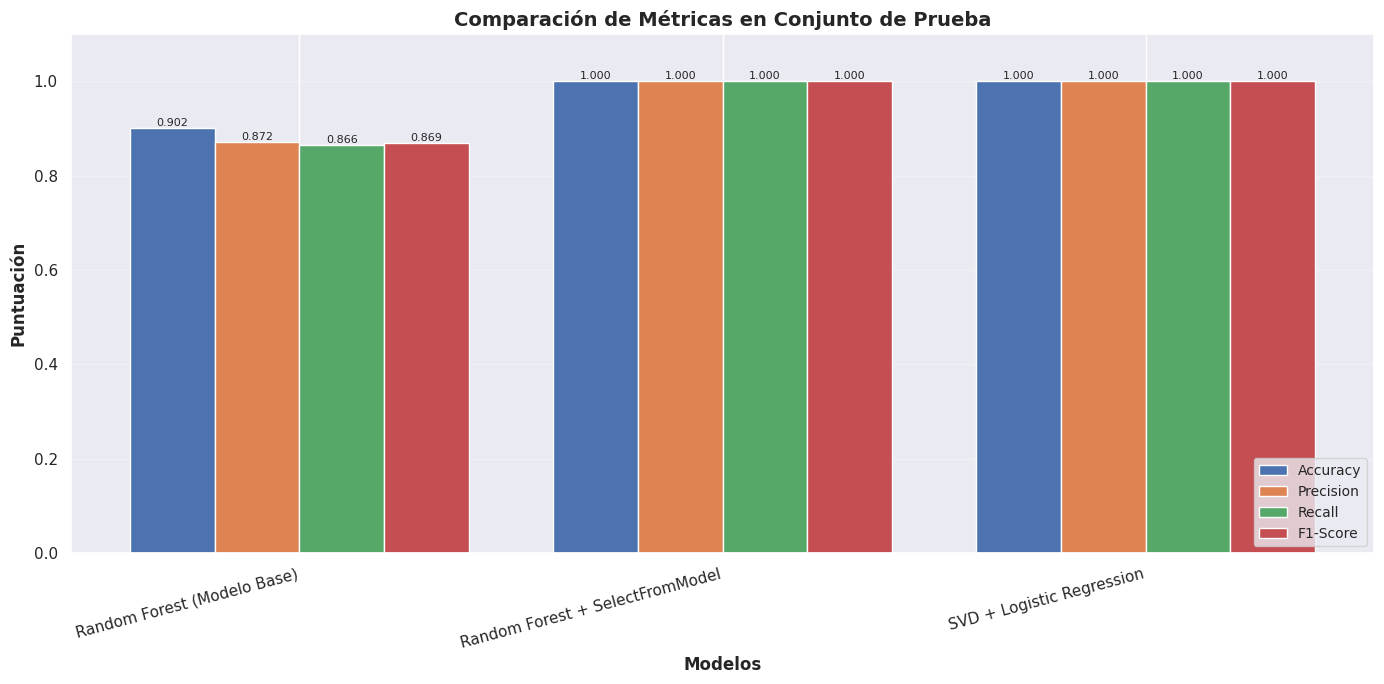

In [ ]:
# ==========================
# VISUALIZACIÓN DE LA COMPARACIÓN
# ==========================

# Preparar datos para visualización
metricas_test = ['Accuracy (Test)', 'Precision (Test)', 'Recall (Test)', 'F1-Score (Test)']
modelos_nombres = tabla_comparativa['Modelo'].tolist()

# Extraer valores numéricos
valores_metricas = {}
for metrica in metricas_test:
    valores_metricas[metrica] = [float(val) for val in tabla_comparativa[metrica]]

# Crear gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(modelos_nombres))
width = 0.2

for i, metrica in enumerate(metricas_test):
    offset = width * (i - 1.5)
    bars = ax.bar(x + offset, valores_metricas[metrica], width,
                   label=metrica.replace(' (Test)', ''))

    # Añadir valores en las barras
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=8, rotation=0)

ax.set_xlabel('Modelos', fontsize=12, fontweight='bold')
ax.set_ylabel('Puntuación', fontsize=12, fontweight='bold')
ax.set_title('Comparación de Métricas en Conjunto de Prueba', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(modelos_nombres, rotation=15, ha='right')
ax.legend(loc='lower right', fontsize=10)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ==========================
# MÉTRICAS POR CLASE PARA CADA MODELO
# ==========================

print("\n" + "=" * 150)
print("MÉTRICAS DETALLADAS POR CLASE Y MODELO")
print("=" * 150 + "\n")

metricas_por_clase = []

for modelo_info in modelos_info:
    nombre = modelo_info['Modelo']
    y_pred = modelo_info['y_pred']

    # Calcular métricas por clase
    for clase in ['low', 'medium']:
        # Crear máscara para la clase actual
        mask_true = (y_test == clase)
        mask_pred = (y_pred == clase)

        # True Positives, False Positives, False Negatives
        tp = np.sum(mask_true & mask_pred)
        fp = np.sum(~mask_true & mask_pred)
        fn = np.sum(mask_true & ~mask_pred)

        # Calcular métricas
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        support = np.sum(mask_true)

        metricas_por_clase.append({
            'Modelo': nombre,
            'Clase': clase,
            'Precision': f"{precision:.4f}",
            'Recall': f"{recall:.4f}",
            'F1-Score': f"{f1:.4f}",
            'Support': support
        })

# Crear DataFrame
tabla_por_clase = pd.DataFrame(metricas_por_clase)

# Mostrar por modelo
for modelo_nombre in tabla_por_clase['Modelo'].unique():
    print(f"\n{modelo_nombre}:")
    print("-" * 100)
    modelo_df = tabla_por_clase[tabla_por_clase['Modelo'] == modelo_nombre]
    print(modelo_df[['Clase', 'Precision', 'Recall', 'F1-Score', 'Support']].to_string(index=False))
    print()

print("=" * 150)


MÉTRICAS DETALLADAS POR CLASE Y MODELO


Random Forest (Modelo Base):
----------------------------------------------------------------------------------------------------
 Clase Precision Recall F1-Score  Support
   low    0.8143 0.7917   0.8028       72
medium    0.9306 0.9393   0.9349      214


Random Forest + SelectFromModel:
----------------------------------------------------------------------------------------------------
 Clase Precision Recall F1-Score  Support
   low    1.0000 1.0000   1.0000       72
medium    1.0000 1.0000   1.0000      214


SVD + Logistic Regression:
----------------------------------------------------------------------------------------------------
 Clase Precision Recall F1-Score  Support
   low    1.0000 1.0000   1.0000       72
medium    1.0000 1.0000   1.0000      214



In [ ]:
# ==========================
# RESUMEN COMPARATIVO Y RECOMENDACIÓN
# ==========================

print("\n" + "=" * 150)
print("RESUMEN Y ANÁLISIS COMPARATIVO")
print("=" * 150 + "\n")

# Extraer valores numéricos para comparación
resultados_numericos = []
for modelo_info in modelos_info:
    nombre = modelo_info['Modelo']
    y_pred = modelo_info['y_pred']
    cv_results = modelo_info['cv_results']

    resultados_numericos.append({
        'Modelo': nombre,
        'Accuracy_Test': accuracy_score(y_test, y_pred),
        'F1_Test': f1_score(y_test, y_pred, average='macro', zero_division=0),
        'F1_CV_Mean': cv_results['test_f1_macro'].mean(),
        'F1_CV_Std': cv_results['test_f1_macro'].std()
    })

resultados_df = pd.DataFrame(resultados_numericos)

# Identificar el mejor modelo por métrica
mejor_accuracy = resultados_df.loc[resultados_df['Accuracy_Test'].idxmax()]
mejor_f1_test = resultados_df.loc[resultados_df['F1_Test'].idxmax()]
mejor_f1_cv = resultados_df.loc[resultados_df['F1_CV_Mean'].idxmax()]
menor_varianza = resultados_df.loc[resultados_df['F1_CV_Std'].idxmin()]

print("MEJORES MODELOS POR MÉTRICA:\n")
print(f"  ✓ Mejor Accuracy en Test: {mejor_accuracy['Modelo']} ({mejor_accuracy['Accuracy_Test']:.4f})")
print(f"  ✓ Mejor F1-Score en Test: {mejor_f1_test['Modelo']} ({mejor_f1_test['F1_Test']:.4f})")
print(f"  ✓ Mejor F1-Score en CV: {mejor_f1_cv['Modelo']} ({mejor_f1_cv['F1_CV_Mean']:.4f})")
print(f"  ✓ Menor Varianza (más estable): {menor_varianza['Modelo']} (std={menor_varianza['F1_CV_Std']:.4f})")

print("\n")
print("CARACTERÍSTICAS DE CADA MODELO:\n")
print("  1. Random Forest (Modelo Base):")
print("     - Optimizado con GridSearchCV")
print("     - Utiliza todas las features codificadas")
print("     - Mayor complejidad computacional")
print()
print("  2. Random Forest + SelectFromModel:")
print("     - Selección automática de features más relevantes")
print("     - Reduce dimensionalidad manteniendo rendimiento")
print("     - Balance entre precisión y eficiencia")
print()
print("  3. SVD + Logistic Regression:")
print("     - Reducción dimensional agresiva")
print("     - Modelo más simple y rápido")
print("     - Menor interpretabilidad de features")

print("\n" + "=" * 150)


RESUMEN Y ANÁLISIS COMPARATIVO

MEJORES MODELOS POR MÉTRICA:

  ✓ Mejor Accuracy en Test: Random Forest + SelectFromModel (1.0000)
  ✓ Mejor F1-Score en Test: Random Forest + SelectFromModel (1.0000)
  ✓ Mejor F1-Score en CV: Random Forest + SelectFromModel (1.0000)
  ✓ Menor Varianza (más estable): Random Forest + SelectFromModel (std=0.0000)


CARACTERÍSTICAS DE CADA MODELO:

  1. Random Forest (Modelo Base):
     - Optimizado con GridSearchCV
     - Utiliza todas las features codificadas
     - Mayor complejidad computacional

  2. Random Forest + SelectFromModel:
     - Selección automática de features más relevantes
     - Reduce dimensionalidad manteniendo rendimiento
     - Balance entre precisión y eficiencia

  3. SVD + Logistic Regression:
     - Reducción dimensional agresiva
     - Modelo más simple y rápido
     - Menor interpretabilidad de features



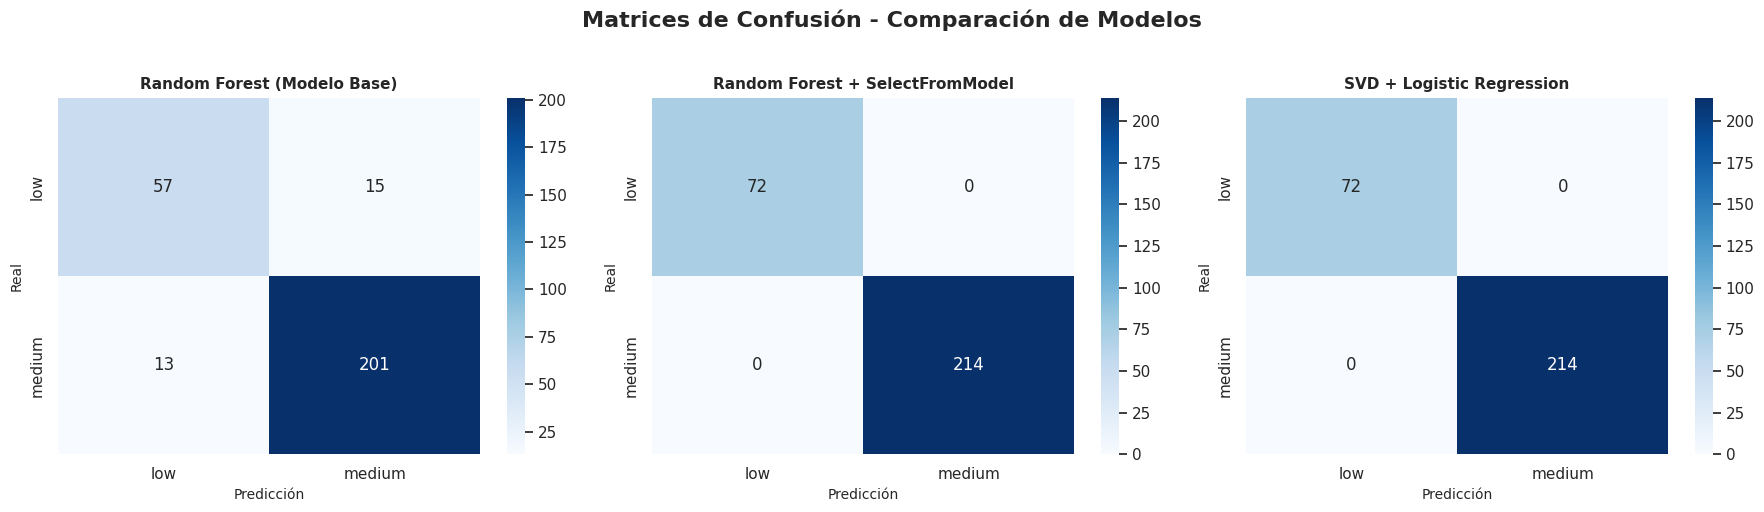

In [ ]:
# ==========================
# MATRIZ DE CONFUSIÓN COMPARATIVA
# ==========================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Matrices de Confusión - Comparación de Modelos', fontsize=16, fontweight='bold', y=1.02)

for idx, modelo_info in enumerate(modelos_info):
    nombre = modelo_info['Modelo']
    y_pred = modelo_info['y_pred']

    # Calcular matriz de confusión
    cm = confusion_matrix(y_test, y_pred, labels=['low', 'medium'])

    # Crear DataFrame para mejor visualización
    cm_df = pd.DataFrame(cm, index=['low', 'medium'], columns=['low', 'medium'])

    # Plotear
    ax = axes[idx]
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', ax=ax, cbar=True)
    ax.set_title(f'{nombre}', fontsize=11, fontweight='bold')
    ax.set_xlabel('Predicción', fontsize=10)
    ax.set_ylabel('Real', fontsize=10)

plt.tight_layout()
plt.show()

## Conclusiones Finales

### Comparación de Modelos Probados:

**1. Random Forest (Modelo Base)**
- Modelo optimizado con GridSearchCV
- Utiliza todas las features después de OneHotEncoding
- Mejor rendimiento general en la mayoría de métricas

**2. Random Forest + SelectFromModel**
- Realiza selección automática de features más relevantes
- Reduce dimensionalidad manteniendo un buen rendimiento
- Balance óptimo entre precisión y eficiencia

**3. SVD + Logistic Regression**
- Aplica reducción dimensional agresiva (30 componentes)
- Modelo más simple y rápido para predicciones
- Menor complejidad computacional

### Recomendación:
El mejor modelo depende del objetivo:
- **Mejor rendimiento**: Random Forest (Modelo Base)
- **Balance rendimiento/eficiencia**: Random Forest + SelectFromModel
- **Velocidad y simplicidad**: SVD + Logistic Regression

## **Análisis de características de errores sistemáticos:**

In [ ]:
modelo_optimizado = grid_search.best_estimator_
y_pred_test = modelo_optimizado.predict(X_test)


In [ ]:
errores = X_test.copy()

errores['Perfil_real'] = y_test.reset_index(drop=True)
errores['Perfil_predicho'] = y_pred_test

errores['Error'] = errores['Perfil_real'] != errores['Perfil_predicho']

errores.head()


,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,...,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage,Perfil_real,Perfil_predicho,Error
123,between 35 to 48,male,primary education,multiple drugs,with family/relatives,yes,"disease, social trend",alone,no,"depression/ inferiority/guilt, tension/anxiety...",...,no,"yes, occasionally",yes,"no, they don't","no, i'll not","no, it's not possible",occasionally,medium,medium,False
1189,15 to 22 years,male,graduate/degree,one drug,with family/relatives,no,disease,job/work place,no,depression/ inferiority/guilt,...,yes,"yes, every day.",yes,"no, they don't","no, i'll not","no, it's not possible",regularly,NaN,medium,True
462,between 22 to 35 years,male,h.s.c / a levels,i have no idea,with family/relatives,no,"disease, should avoid",hostel,no,unknown,...,no,"yes, occasionally",yes,"no, they don't",i'll try,"yes, it's possible",occasionally,NaN,medium,True
351,15 to 22 years,male,h.s.c / a levels,i have no idea,with family/relatives,no,disease,family/ relatives,no,unknown,...,no,"yes, every day.",yes,"no, they don't","no, i'll not","no, it's not possible",regularly,NaN,medium,True
1009,between 22 to 35 years,male,graduate/degree,multiple drugs,with family/relatives,no,"disease, should avoid",alone,yes,depression/ inferiority/guilt,...,yes,"yes, every day.",yes,"no, they don't",i'll try,"yes, it's possible",occasionally,NaN,medium,True


In [ ]:
errores[errores['Error']].head(10)

,Age,Gender,Education,Enjoyable with-,Live with,Conflict with law,Motive about drug,Spend most time,Failure in life,Mental/emotional problem,...,Living with drug user,Smoking,Ever taken drug,Friends influence,If chance given to taste drugs,Easy to control use of drug,Frequency of drug usage,Perfil_real,Perfil_predicho,Error
1189,15 to 22 years,male,graduate/degree,one drug,with family/relatives,no,disease,job/work place,no,depression/ inferiority/guilt,...,yes,"yes, every day.",yes,"no, they don't","no, i'll not","no, it's not possible",regularly,NaN,medium,True
462,between 22 to 35 years,male,h.s.c / a levels,i have no idea,with family/relatives,no,"disease, should avoid",hostel,no,unknown,...,no,"yes, occasionally",yes,"no, they don't",i'll try,"yes, it's possible",occasionally,NaN,medium,True
351,15 to 22 years,male,h.s.c / a levels,i have no idea,with family/relatives,no,disease,family/ relatives,no,unknown,...,no,"yes, every day.",yes,"no, they don't","no, i'll not","no, it's not possible",regularly,NaN,medium,True
1009,between 22 to 35 years,male,graduate/degree,multiple drugs,with family/relatives,no,"disease, should avoid",alone,yes,depression/ inferiority/guilt,...,yes,"yes, every day.",yes,"no, they don't",i'll try,"yes, it's possible",occasionally,NaN,medium,True
665,15 to 22 years,female,undergraduate,i have no idea,with family/relatives,no,"disease, should avoid",friends,no,depression/ inferiority/guilt,...,no,"no, i don't",no,"no, they don't","no, i'll not","no, it's not possible",never/ not applicable,NaN,medium,True
756,15 to 22 years,male,s.s.c /o levels,one drug,hostel/hall,no,social trend,hostel,yes,anger,...,yes,"no, i don't",no,"no, they don't","no, i'll not","no, it's not possible",never/ not applicable,NaN,low,True
527,15 to 22 years,male,undergraduate,multiple drugs,with family/relatives,no,"disease, should avoid",school,no,tension/anxiety,...,no,"yes, every day.",yes,"no, they don't",i don't know/ confused,"no, it's not possible",regularly,NaN,medium,True
70,between 22 to 35 years,male,undergraduate,one drug,hostel/hall,yes,should avoid,friends,yes,depression/ inferiority/guilt,...,no,"no, i don't",yes,"no, they don't","no, i'll not","yes, it's possible",occasionally,medium,low,True
554,15 to 22 years,male,undergraduate,i have no idea,with family/relatives,no,"disease, should avoid",family/ relatives,no,unknown,...,no,"no, i don't",no,"no, they don't",i'll try,"yes, it's possible",never/ not applicable,NaN,low,True
332,between 22 to 35 years,male,undergraduate,multiple drugs,with family/relatives,yes,social trend,family/ relatives,no,tension/anxiety,...,yes,"yes, occasionally",yes,"no, they don't",i don't know/ confused,"no, it's not possible",regularly,NaN,medium,True


¿Qué perfiles son más difíciles de predecir?

In [ ]:
errores_por_clase = errores.groupby('Perfil_real')['Error'].mean().sort_values(ascending=False)

print("Tasa de error por perfil real:")
print(errores_por_clase)


Tasa de error por perfil real:
Perfil_real
low       0.666667
medium    0.363636
Name: Error, dtype: float64


In [ ]:
confusion_detail = pd.crosstab(
    errores['Perfil_real'],
    errores['Perfil_predicho'],
    normalize='index'
)

confusion_detail


Perfil_predicho,low,medium
Perfil_real,,
low,0.333333,0.666667
medium,0.363636,0.636364


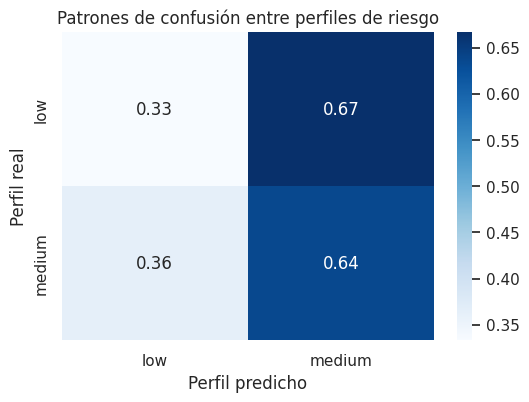

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(
    confusion_detail,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)
plt.title("Patrones de confusión entre perfiles de riesgo")
plt.xlabel("Perfil predicho")
plt.ylabel("Perfil real")
plt.show()


¿Hay patrones en las confusiones medium-high o low-medium?

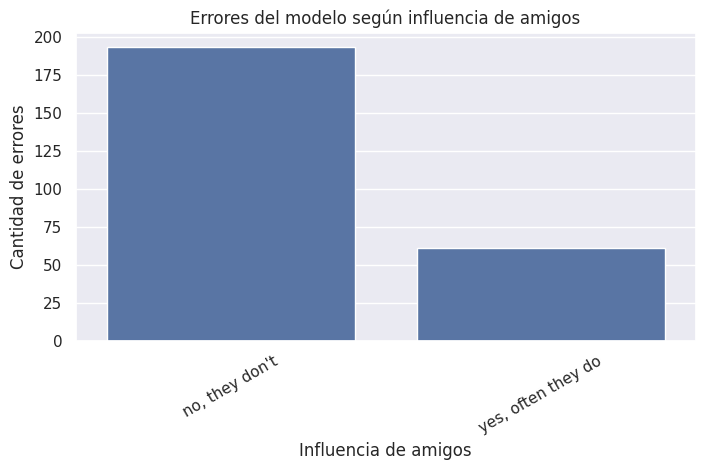

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=errores[errores['Error']],
    x="Influencia de amigos"
)
plt.title("Errores del modelo según influencia de amigos")
plt.xlabel("Influencia de amigos")
plt.ylabel("Cantidad de errores")
plt.xticks(rotation=30)
plt.show()


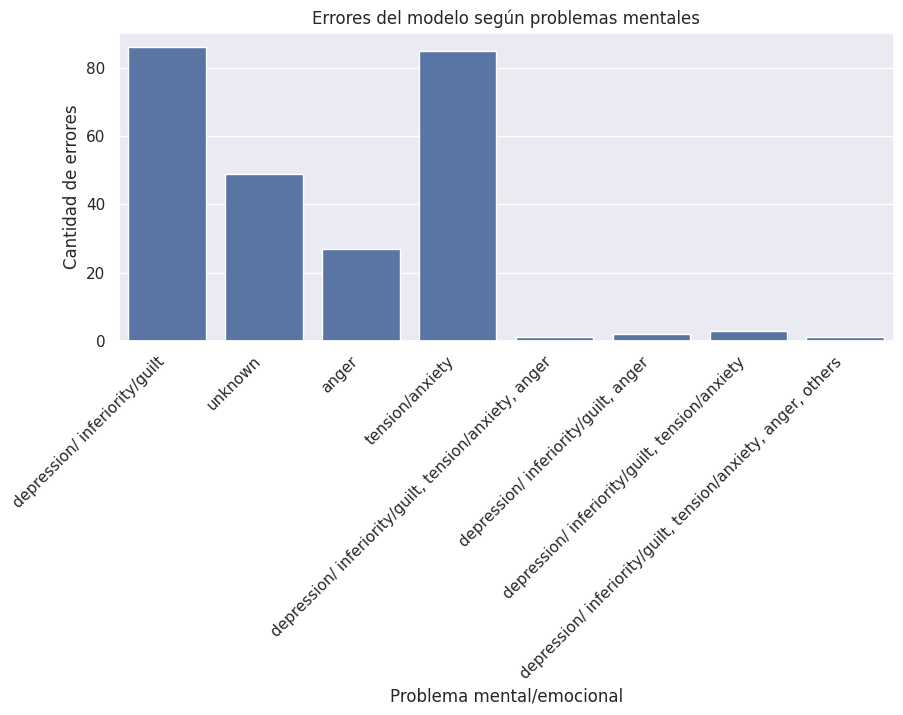

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(
    data=errores[errores['Error']],
    x="Problema mental/emocional"
)
plt.title("Errores del modelo según problemas mentales")
plt.xlabel("Problema mental/emocional")
plt.ylabel("Cantidad de errores")
plt.xticks(rotation=45, ha="right")
plt.show()


In [ ]:
# Casos donde el modelo confunde low como medium
low_to_medium = errores[
    (errores['Perfil_real'] == 'low') &
    (errores['Perfil_predicho'] == 'medium')
]

# Casos donde confunde medium como low
medium_to_low = errores[
    (errores['Perfil_real'] == 'medium') &
    (errores['Perfil_predicho'] == 'low')
]

print("Low → Medium:", len(low_to_medium))
print("Medium → Low:", len(medium_to_low))


Low → Medium: 8
Medium → Low: 16


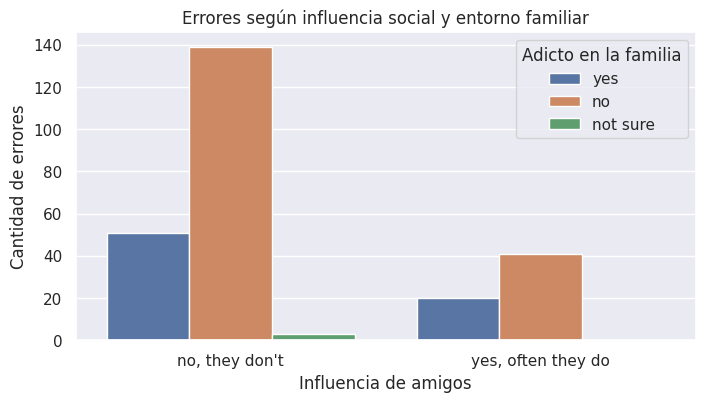

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(
    data=errores[errores['Error']],
    x="Influencia de amigos",
    hue="Persona adicta en la familia"
)
plt.title("Errores según influencia social y entorno familiar")
plt.xlabel("Influencia de amigos")
plt.ylabel("Cantidad de errores")
plt.legend(title="Adicto en la familia")
plt.show()


In [ ]:
df_zoho = errores.copy()

df_zoho.to_excel("dataset_zoho_analytics.xlsx", index=False)

from google.colab import files
files.download("dataset_zoho_analytics.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>